# Part 1: Read in CSV files and Make Dataframes
1. Get all csv files using glob.glob to path
2. Read CSV files into dataframes
 

In [20]:
import pandas as pd
import os
import glob
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#csvs = glob.glob("C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data/*.csv")
csvs = glob.glob("C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data/*.csv")
print(csvs)
cwd = os.getcwd()
print(cwd)

["C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data\\ML0001_1.csv", "C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data\\ML0002_1.csv", "C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data\\ML0003_1.csv", "C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data\\ML0004_1.csv", "C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data\\ML0005_1.csv", "C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data\\ML0006_1.csv", "C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data\\ML0010_1.csv", "C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data\\ML0013_1.csv", "C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data\\ML0014_1.csv", "C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data\\ML0016_1.csv",

In [11]:
agg_min = []
agg_max = []
agg_mean = []
min_fx = []
max_fx = []
mean_fx = []
for csv in csvs:
    df = pd.read_csv(csv, index_col=None, header=0)
    c = df['confidence']
    print(df['confidence'].min())
    agg_min.append(df['confidence'].min())
    agg_max.append(df['confidence'].max())
    agg_mean.append(df['confidence'].mean())
    df = df.drop(df.index [ [0, 90] ])
    df = df.drop(c.index [ [len(c.index)-90, len(c.index)-1] ])
    min_fx.append(df['confidence'].min())
    max_fx.append(df['confidence'].max())
    mean_fx.append(df['confidence'].mean())
    #data.append(df)

0.93
0.88
0.0
0.88
0.03
0.03
0.03
0.88
0.73
0.88
0.03
0.77
0.77
0.77
0.03
0.03
0.0
0.0
0.03
0.88
0.03
0.93
0.82
0.03
0.03
0.77
0.03
0.77
0.03
0.03
0.77
0.88
0.03
0.03
0.88
0.38
0.98
0.88
0.03
0.03
0.03
0.03
0.03
0.03
0.88
0.03
0.03
0.0
0.0
0.0
0.77
0.0
0.03
0.03
0.03
0.0
0.0
0.77
0.03
0.0
0.0
0.88
0.0
0.0
0.03
0.0
0.03
0.03
0.0
0.03
0.03
0.03
0.77
0.03
0.77
0.03
0.93
0.03
0.0
0.88
0.0
0.82
0.0
0.03
0.03
0.03
0.88
0.28
0.03
0.03
0.03
0.0
0.0
0.77
0.03
0.82
0.03
0.03
0.03
0.03
0.88
0.0
0.93
0.03
0.88
0.03
0.03
0.03
0.93
0.88
0.03
0.88
0.03
0.77
0.03
0.03
0.03
0.03
0.03
0.88
0.0
0.88
0.03
0.03
0.03
0.43
0.52
0.88
0.88
0.0
0.77
0.03
0.77
0.03
0.93
0.03
0.77
0.03
0.03
0.0
0.88
0.93
0.03
0.03
0.03
0.03
0.88
0.03
0.03
0.82
0.03
0.03
0.03
0.77
0.77
0.77
0.77
0.82
0.03
0.03
0.77
0.03
0.03
0.77
0.82
0.0
0.77
0.03
0.77
0.03
0.77
0.82
0.03
0.0
0.77
0.0
0.0
0.03
0.0


KeyboardInterrupt: 

In [ ]:
plt.hist(agg_min, bins = 20, edgecolor = 'black')

In [ ]:
plt.hist(agg_max, bins = 20, edgecolor = 'black')

In [ ]:
plt.hist(agg_mean, bins = 20, edgecolor = 'black')

In [ ]:
plt.hist(min_fx, bins = 20)

In [ ]:
plt.hist(max_fx, bins = 20)

(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          1.,   0.,   4.,   4.,   2.,   5.,   5.,  27., 192.]),
 array([0.56112491, 0.58206867, 0.60301242, 0.62395618, 0.64489993,
        0.66584369, 0.68678744, 0.70773119, 0.72867495, 0.7496187 ,
        0.77056246, 0.79150621, 0.81244997, 0.83339372, 0.85433747,
        0.87528123, 0.89622498, 0.91716874, 0.93811249, 0.95905625,
        0.98      ]),
 <BarContainer object of 20 artists>)

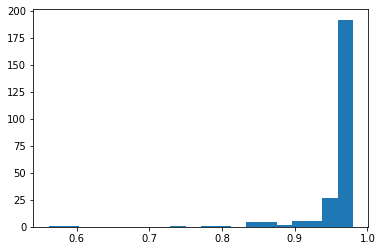

In [56]:
plt.hist(mean_fx, bins = 20)
# 4/27 - Look at videos with ave < 0.6, look at videos with min 0 (identify frames) -> comprehensive report on why we have 0 confidence/0.6 confidence
# Show example video with bad frames


# Part 2: Data Cleaning - Identify and Remove Bad Frames

- Majority of low confidence frames were when subject were looking off to the side and quickly moving their head back to center or shaking their head side to side such that only side profile is visable.
- We defined "good data" as frames with confidence greater than or equal to 0.5.
- Because of adjustments and movements at the beginning of videos, many frames at the beginning of the recording are low confidence. Therefore, we chose to cut out the first 10 seconds (300 frames) of each video.

ML0001_1
[]


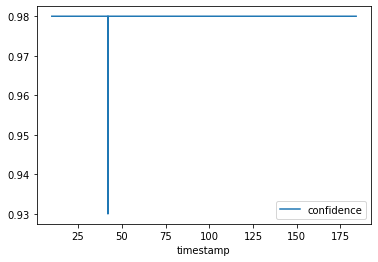

ML0002_1
[]


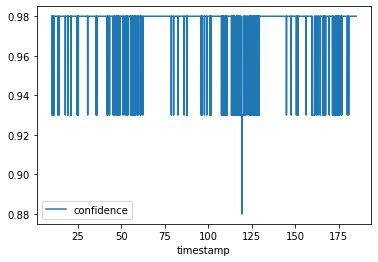

ML0003_1
[]


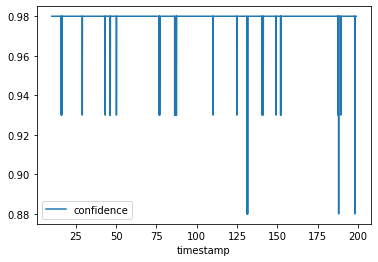

ML0004_1
[]


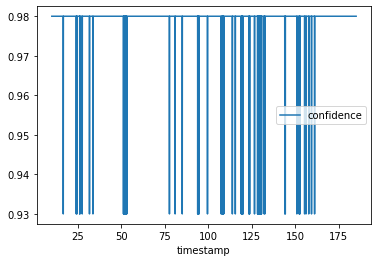

ML0005_1
[43.8, 43.833, 43.867, 43.9, 43.933, 43.967, 44.0, 44.033, 44.2, 70.333, 70.4, 70.567, 71.067, 71.133, 156.967, 157.0]


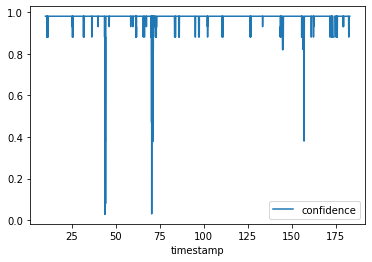

ML0006_1
[15.833, 15.867, 15.933, 15.967, 16.0, 16.033, 16.067, 16.1, 16.133, 16.167, 16.2, 16.233, 16.267, 16.3, 16.333, 16.367, 16.4, 16.433, 16.467, 16.5, 16.533, 16.567, 16.6, 16.633, 16.667, 16.7, 16.733, 16.767, 16.8, 16.833, 16.867, 16.9, 16.933, 16.967, 17.0, 17.033, 17.067, 17.1, 17.133, 17.167, 17.2, 17.233, 17.267, 17.3, 17.333, 17.367, 17.4, 17.433, 17.467, 17.5, 17.533, 17.567, 17.6, 17.633, 17.667, 17.7, 17.733, 17.767, 17.8, 17.833, 17.867, 17.9, 17.933, 17.967, 18.0, 18.033, 18.067, 18.1, 18.133, 18.167, 18.2, 18.233, 18.267, 18.333, 18.367, 18.4, 18.433, 18.467, 18.5, 18.533, 18.567, 18.6, 18.633, 18.667, 18.7, 18.733, 18.767, 18.8, 18.833, 18.867, 18.9, 18.933, 18.967, 19.0, 19.033, 19.067, 19.1, 19.133, 19.167, 19.2, 19.233, 19.267, 19.3, 19.333, 19.367, 19.4, 19.433, 19.467, 19.5, 19.533, 19.567, 19.6, 19.633, 19.667, 19.7, 19.733, 19.767, 19.8, 19.833, 19.867, 19.9, 19.933, 19.967, 20.0, 20.033, 20.067, 20.1, 20.133, 20.167, 20.2, 20.233, 20.267, 20.3, 20.333, 20.3

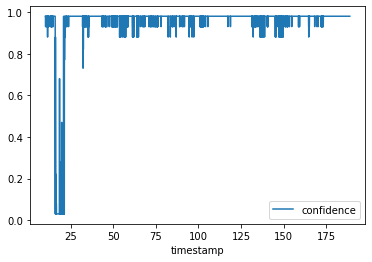

ML0010_1
[55.4, 55.467, 55.5, 55.533, 55.6, 55.633, 55.667, 55.733, 55.833, 55.867, 78.533, 98.767, 98.833, 98.9, 99.533, 100.267, 100.367, 132.567, 132.6, 132.633, 132.667, 132.7, 132.733, 132.767, 132.8, 132.867, 132.9, 132.933, 132.967, 133.067, 133.1, 139.067, 139.1, 139.133, 139.167, 139.2, 139.233, 139.267, 139.3, 139.333, 139.367, 139.4, 139.433, 139.467, 139.5, 139.533, 139.567, 139.6, 139.633, 139.8, 139.833, 139.867, 140.033, 140.1, 140.133, 140.167, 140.2, 140.233, 140.267, 147.367, 147.4, 147.5, 147.733, 147.8, 178.7, 180.067, 182.467, 183.233, 183.3, 183.467, 183.733, 183.767, 183.8, 183.833, 183.9, 183.967]


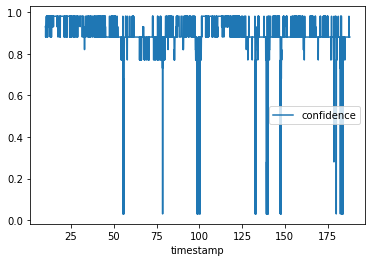

ML0013_1
[]


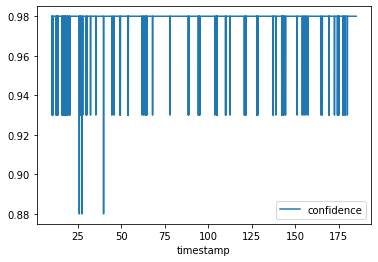

ML0014_1
[]


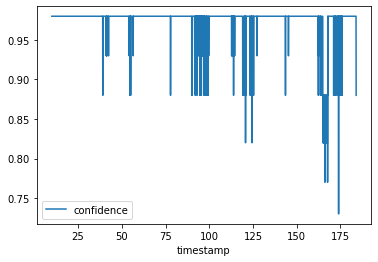

ML0016_1
[]


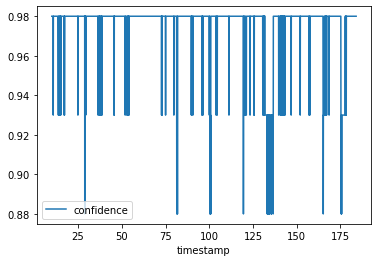

ML0017_1
[27.933, 50.533]


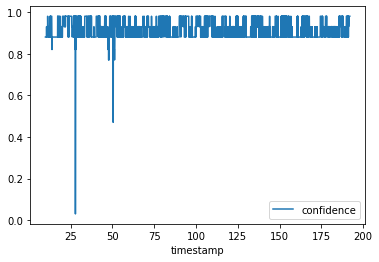

ML0019_1
[]


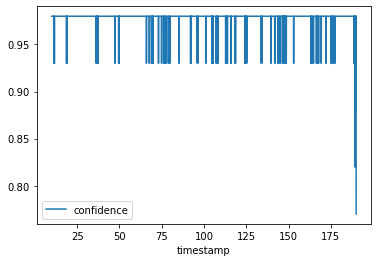

ML0020_1
[]


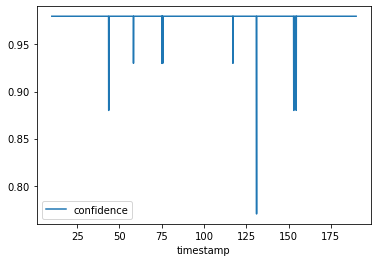

ML0021_1
[]


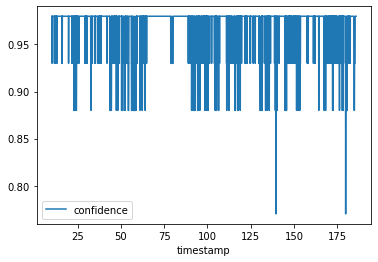

ML0023_1
[31.2, 31.233, 31.267, 31.3, 31.333, 31.367, 31.4, 31.467, 31.5, 31.533, 31.567, 31.6, 31.633, 31.667, 31.7, 31.733, 31.767, 31.8, 31.833, 31.867, 31.9, 31.933, 31.967, 32.0, 32.033, 32.067, 32.1, 32.133, 32.167, 32.2, 32.233, 32.267, 32.3, 32.333, 32.367, 32.4, 32.433, 32.467, 32.5, 32.533, 32.567, 32.6, 32.633, 32.667, 32.7, 32.8, 32.833, 32.867, 32.9, 32.933, 32.967, 33.033, 33.167, 33.2, 33.233, 33.267, 33.3, 33.333, 33.367, 33.4, 33.433, 33.467, 33.5, 33.533, 33.567, 33.6, 33.633, 33.667, 33.7, 33.733, 33.767, 33.8, 33.833, 33.867, 33.9, 33.933, 33.967, 34.0, 34.033, 34.067, 34.1, 34.133, 34.167, 34.2, 34.233, 34.267, 34.3, 34.333, 34.367, 34.4, 64.3, 64.333, 64.367, 64.4, 64.433, 64.467, 64.5, 64.533, 64.567, 64.6, 64.633, 64.667, 64.7, 64.733, 64.767, 64.8, 64.833, 64.867, 64.9, 64.933, 64.967, 65.0, 65.033, 65.067, 65.1, 65.133, 65.167, 65.2, 65.233, 65.267, 65.333, 65.433, 65.5, 65.533, 65.567, 65.6, 65.633, 65.667, 65.733, 65.767, 65.8, 65.833, 65.867, 65.9, 65.933, 

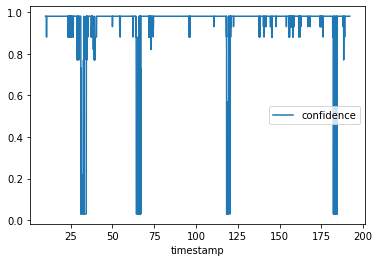

ML0025_1
[141.3]


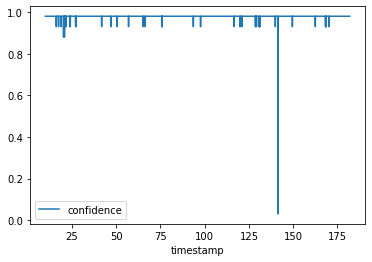

ML0029_1
[42.267, 54.867, 54.9, 54.933, 54.967, 55.033, 55.067, 55.1, 55.133, 55.233, 55.267, 55.333, 55.367, 55.4, 55.433, 55.467, 55.5, 55.9, 55.933, 55.967, 56.0, 56.167, 56.933, 57.367, 57.5, 57.567, 57.633, 57.7, 57.767, 57.833, 57.9, 57.933, 57.967, 58.0, 58.033, 58.1, 58.167, 58.233, 58.267, 58.3, 58.333, 58.367, 58.433, 58.5, 58.567, 58.667, 58.8, 58.867, 58.933, 58.967, 59.0, 59.033, 59.067, 59.1, 59.133, 59.167, 59.2, 59.233, 59.267, 59.3, 59.333, 59.367, 59.4, 59.433, 61.067, 61.133, 61.2, 61.567, 61.6, 61.633, 61.667, 61.767, 61.833, 75.833, 76.133, 77.833, 77.9, 78.033, 78.067, 78.1, 78.3, 78.367, 78.4, 78.433, 78.467, 78.5, 78.533, 78.567, 78.6, 78.633, 78.667, 78.7, 78.733, 78.767, 78.8, 78.833, 78.867, 78.9, 78.933, 78.967, 79.0, 79.033, 79.067, 79.1, 79.2, 79.3, 79.333, 79.367, 79.4, 79.433, 79.467, 79.5, 79.533, 82.5, 83.667, 84.267, 86.433, 86.567, 86.6, 87.833, 87.933, 87.967, 88.0, 88.033, 106.433, 106.467, 106.5, 106.567, 106.6, 106.633, 106.667, 106.7, 106.733, 1

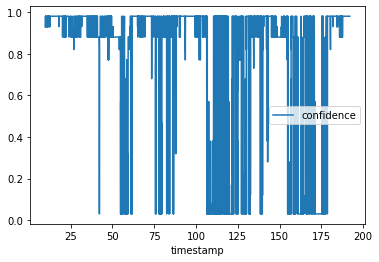

ML0030_1
[]


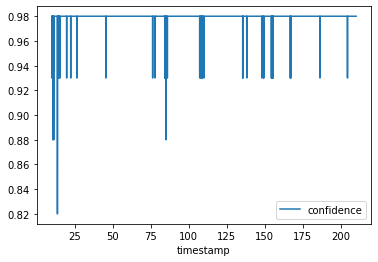

ML0031_1
[19.967]


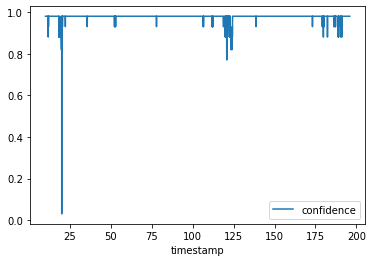

ML0032_1
[]


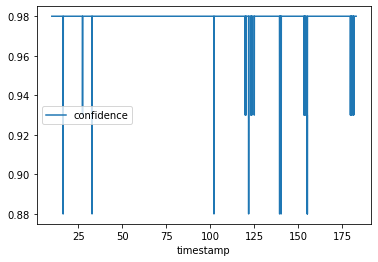

ML0033_1
[85.467, 85.5, 85.533, 90.267, 90.333, 90.4, 90.433]


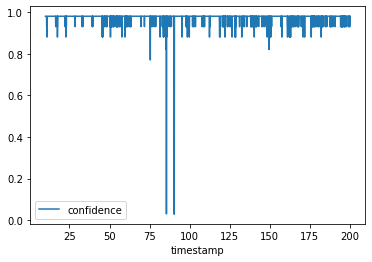

ML0034_1
[]


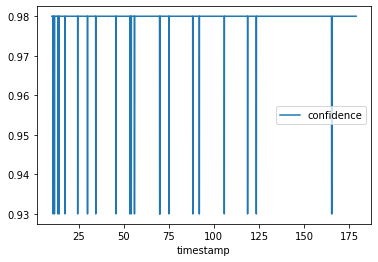

ML0037_1
[]


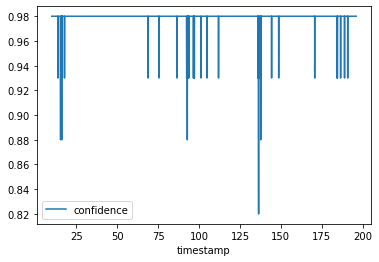

ML0038_1
[136.967, 137.0]


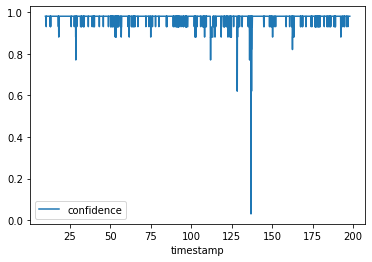

ML0039_1
[174.033]


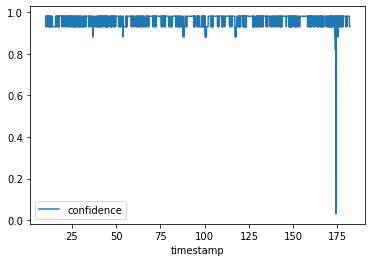

ML0040_1
[]


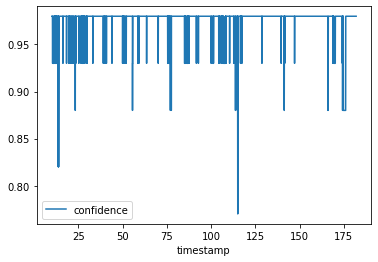

ML0041_1
[148.267, 148.3, 148.6]


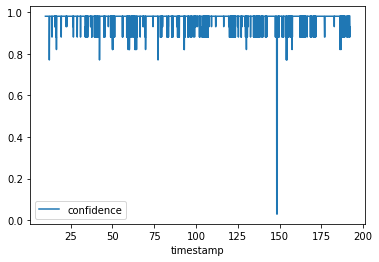

ML0042_1
[]


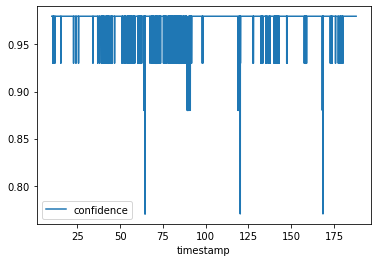

ML0043_1
[]


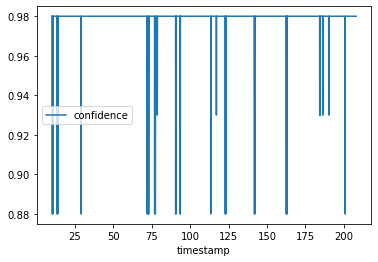

ML0044_1
[]


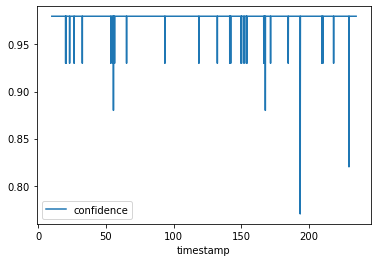

ML0046_1
[]


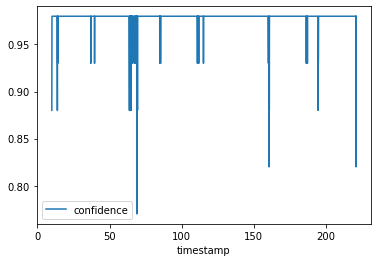

ML0047_1
[]


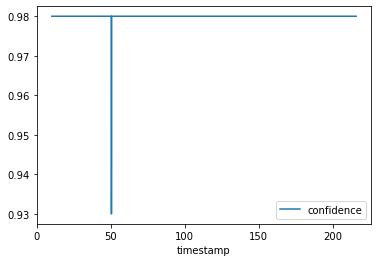

ML0048_1
[62.9, 62.933, 62.967, 63.0, 63.033, 63.067, 63.1, 63.133, 63.167, 63.2, 63.233, 63.267, 63.3, 63.333, 63.367, 63.4, 63.433, 63.467, 63.5, 63.533, 63.567, 63.6, 63.633, 63.667, 63.7, 63.733, 63.767, 63.8, 63.833, 63.867, 63.9, 63.933, 63.967, 64.0, 64.033, 64.1, 64.133, 68.7, 68.733, 68.767, 68.8, 68.833, 68.867, 68.9, 68.933, 68.967, 69.0, 69.033, 69.067, 69.1, 69.133, 69.167, 69.2, 69.233, 69.267, 69.3, 69.333, 69.367, 69.4, 69.433, 69.467, 69.5, 69.533, 69.567, 69.6, 69.633, 69.667, 69.7, 69.733, 69.767, 69.8, 69.833, 69.867, 69.9, 69.933, 69.967, 70.0]


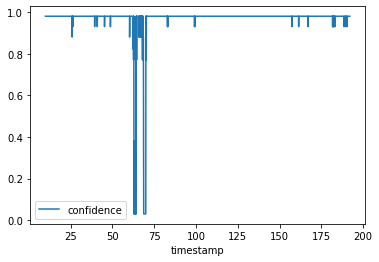

ML0049_1
[102.2]


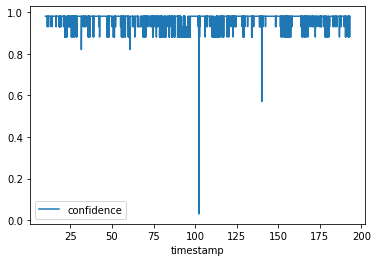

ML0050_1
[]


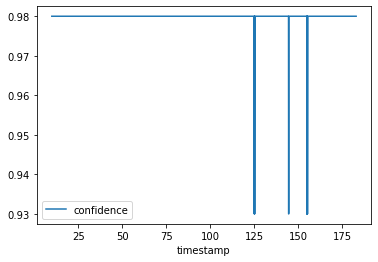

ML0052_1
[122.733, 122.767, 123.0]


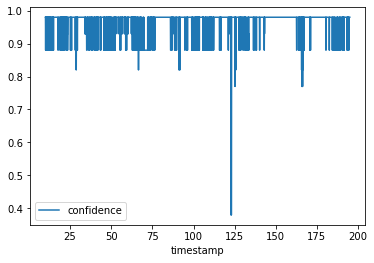

ML0054_1
[]


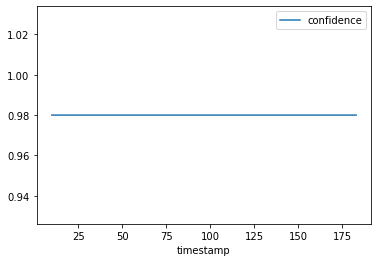

ML0055_1
[]


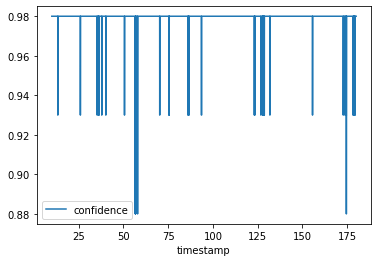

ML0129_1
[71.567, 77.367, 77.4, 77.833, 77.933, 78.067, 78.133, 78.2, 78.367, 78.433, 78.5, 78.6, 78.667, 78.733, 78.867, 79.333, 79.733, 79.867, 79.967, 80.033, 80.1, 80.2, 80.4, 82.0, 82.4, 82.467, 82.533, 82.633, 82.7, 82.767, 82.867, 82.933, 83.0, 83.067, 83.167, 83.233, 83.3, 83.367, 83.567, 83.633, 83.867, 84.2, 84.433, 84.533, 84.7, 84.8, 84.933, 85.1, 85.6, 85.767, 85.833, 85.9, 85.967, 86.1, 86.233, 86.3, 86.367, 87.433, 87.467, 87.633, 89.367, 89.433, 89.533, 89.6, 89.667, 89.733, 89.8, 89.867, 89.933, 90.0, 90.1, 90.133, 90.367, 90.5, 90.567, 90.667, 90.7, 92.1, 92.267, 92.333, 92.467, 92.5, 92.533, 92.667, 92.867, 93.567, 93.6, 93.633, 93.667, 93.7, 93.733, 93.767, 93.8, 93.833, 93.9, 93.967, 94.067, 94.1, 94.3, 98.267, 98.967, 99.033, 99.133, 99.2, 99.6, 99.633, 99.667, 99.7, 99.8, 99.833, 99.867, 99.9, 99.933, 99.967, 100.0, 100.033, 100.067, 100.1, 100.133, 100.167, 100.2, 100.233, 100.267, 100.3, 100.333, 100.367, 100.4, 100.433, 100.467, 100.5, 100.533, 100.567, 100.6,

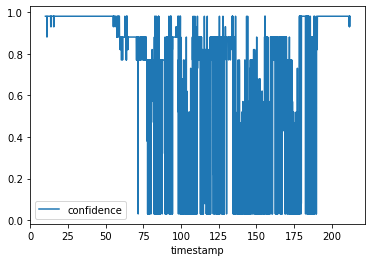

ML0131_1
[185.567, 185.7, 185.733, 185.833, 186.033, 186.067, 186.167, 186.2, 186.233, 186.267, 186.3, 186.333, 186.367, 186.4, 186.433, 186.467, 186.5]


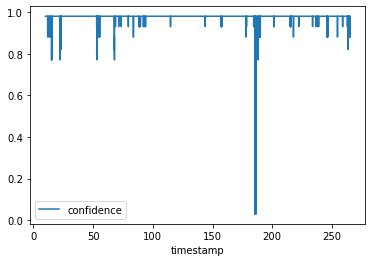

ML0132_1
[146.133, 146.167]


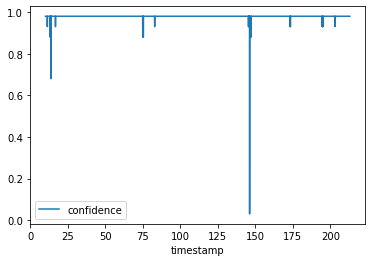

ML0133_1
[59.233]


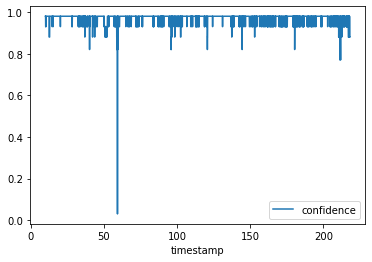

ML0135_1
[]


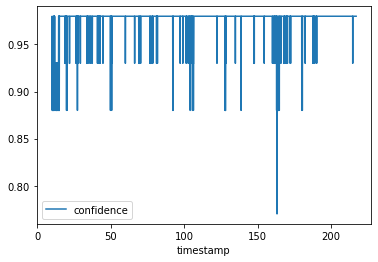

ML0136_1
[]


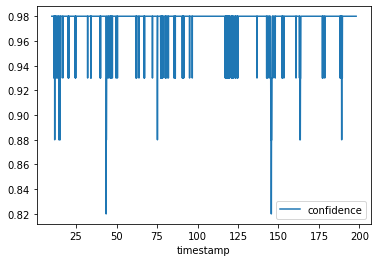

ML0138_1
[]


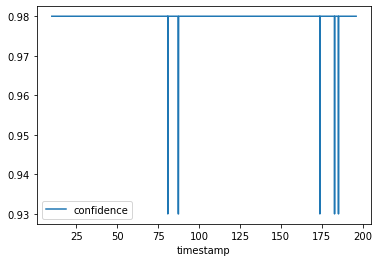

ML0139_1
[13.8, 13.9, 13.933, 14.0, 14.033, 14.067, 14.1, 14.133, 14.167, 14.2, 14.233, 14.267, 14.3, 14.333, 14.367, 14.4, 14.433, 14.467, 14.5, 44.733, 44.767, 44.8, 44.833, 44.867, 44.9, 44.933, 44.967, 45.0, 45.033, 45.067, 45.1, 45.133, 45.167, 45.2, 45.233, 45.267, 45.3, 45.333, 45.367, 45.4, 45.433, 45.467, 45.5, 45.533, 45.567, 45.6, 45.633, 45.667, 45.7, 45.733, 45.767, 45.8, 45.833, 59.267, 69.1, 69.133, 69.2, 69.233, 69.267, 69.333, 69.367, 69.4, 95.967, 96.0, 96.033, 96.067, 96.1, 96.133, 96.167, 96.7, 96.733, 96.767, 96.8, 96.833, 96.867, 96.9, 96.933, 96.967, 97.0, 97.033, 97.067, 97.1, 97.133, 97.167, 97.2, 97.233, 97.267, 97.3, 97.333, 162.533, 162.567, 162.6, 162.667, 162.733, 162.767, 162.8, 162.833, 162.867, 162.9, 162.933, 164.033, 164.1, 164.167, 164.233, 164.367, 164.4, 164.433, 164.5, 164.533, 164.567, 165.333, 165.9, 165.933, 165.967, 166.0, 166.067, 166.1, 166.133, 166.167, 166.2, 180.7, 180.767, 181.3, 181.333, 181.967]


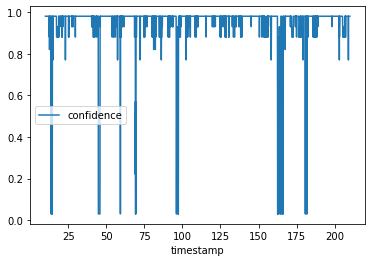

ML0140_1
[99.767]


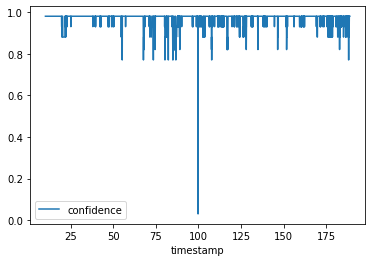

ML0144_1
[]


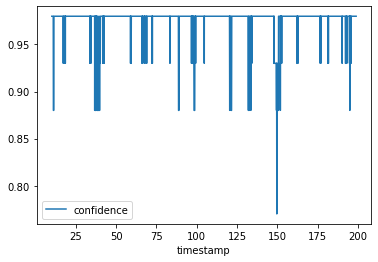

ML0145_1
[138.067, 138.1, 138.133, 138.167, 138.2, 138.267, 138.3, 138.333, 138.367, 138.4, 138.433, 138.467, 138.5, 138.533, 138.567, 138.6, 138.633, 138.667, 138.7, 138.733, 138.767, 138.8, 138.833, 138.867, 138.9, 138.933, 138.967, 139.0, 139.033, 139.067, 139.1, 139.133, 139.167, 139.2, 139.233, 139.267, 139.3, 139.333, 139.367, 139.4, 139.433, 139.467, 139.5]


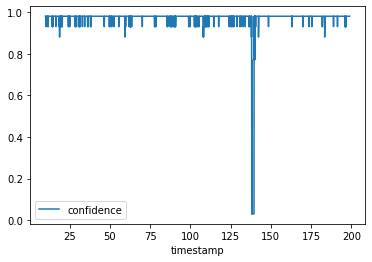

ML0146_1
[]


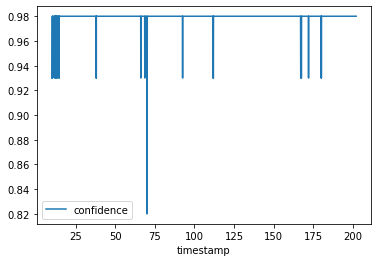

ML0147_1
[]


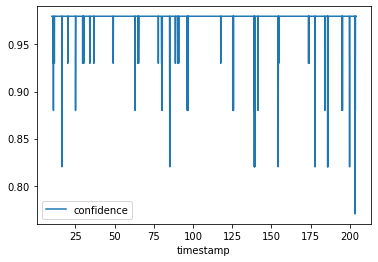

ML0148_1
[]


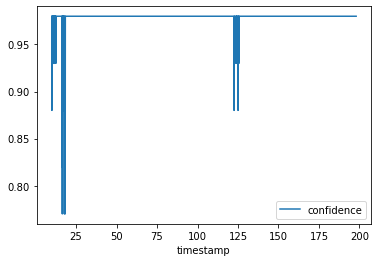

ML0149_1
[34.9, 35.1, 35.167, 56.467, 234.2, 234.233, 234.267, 234.3, 234.333, 234.367, 234.6, 234.633, 234.667, 234.7, 234.733, 234.767, 234.8, 234.833, 234.867, 234.9, 235.233, 235.333]


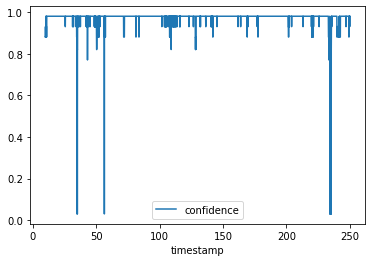

ML0151_1
[11.367]


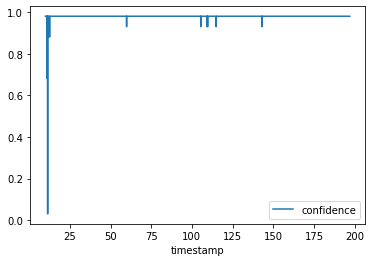

ML0152_1
[]


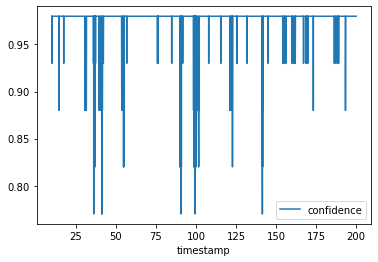

ML0153_1
[]


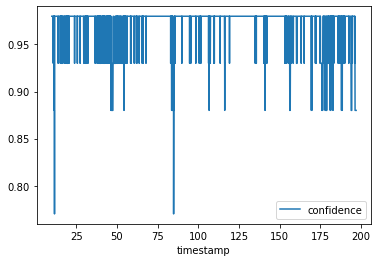

ML0154_1
[97.667, 97.7]


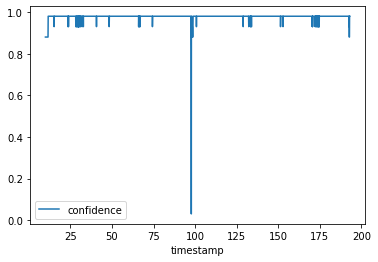

ML0155_1
[]


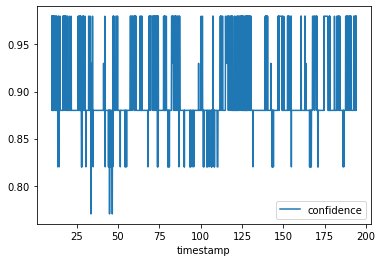

ML0156_1
[79.267, 79.3, 79.333, 79.367, 79.4, 79.433, 79.467, 79.5, 79.533, 79.567]


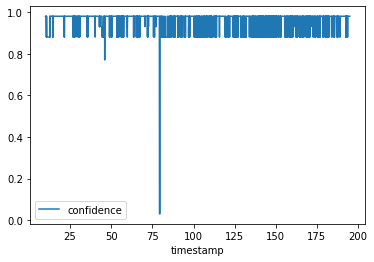

ML0157_1
[]


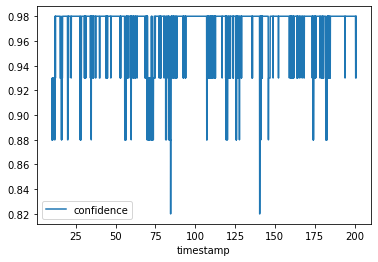

ML0158_1
[153.933, 154.0, 154.067, 158.233, 158.267]


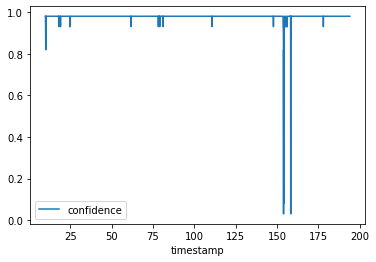

ML0159_1
[]


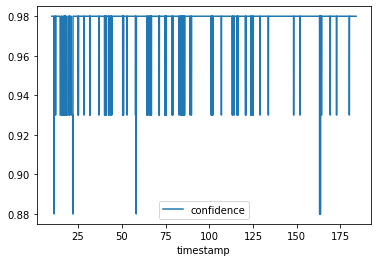

ML0160_1
[]


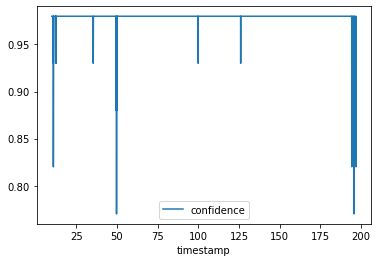

ML0161_1
[10.0, 10.033, 10.067, 10.1, 10.133, 10.167, 10.2, 10.233, 10.267, 10.3, 10.333, 10.367, 10.4, 10.433, 10.467, 10.5, 10.533, 10.567, 10.6, 10.633, 10.667, 10.7, 10.733, 10.767, 10.8, 10.833, 10.867, 10.9, 10.933, 10.967, 11.0, 11.033, 11.067, 11.1, 11.133, 11.167, 11.2, 11.233, 11.267, 11.3, 11.333, 11.367, 11.4, 11.433, 11.467, 11.5, 11.533, 11.567, 11.6, 11.633, 11.667, 11.7, 11.733, 11.767, 11.8, 11.833, 11.867, 11.9, 11.933, 11.967, 12.0, 12.033, 12.067, 12.1, 12.133, 12.167, 12.2, 12.233, 12.267, 12.3, 12.333, 12.367, 12.4, 12.433, 12.467, 12.5, 12.533, 12.567, 12.6, 12.633, 12.667, 12.7, 12.733, 12.767, 12.8, 12.833, 12.867, 12.9, 12.933, 12.967, 13.0, 13.033, 13.067, 13.1, 13.133, 13.167, 13.2, 13.233, 13.267, 13.3, 13.333, 13.367, 13.4, 13.433, 13.467, 13.5, 13.533, 13.567, 13.6, 13.633, 13.667, 13.7, 13.733, 13.767, 13.8, 13.833, 13.867, 13.9, 13.933, 13.967, 14.0, 14.033, 14.067, 14.1, 14.133, 14.167, 14.2, 14.233, 14.267, 14.3, 14.333, 14.367, 14.4, 14.433, 14.467, 

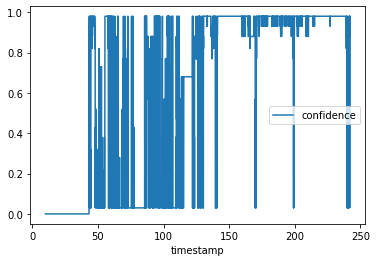

ML0162_1
[]


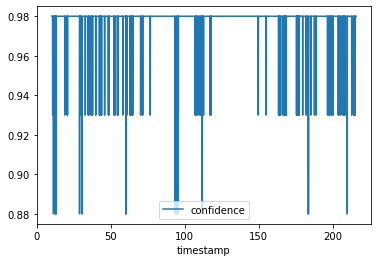

ML0163_1
[]


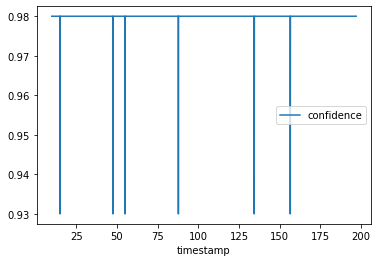

ML0165_1
[57.367]


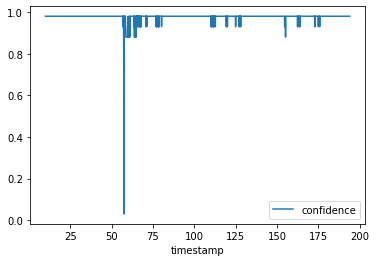

ML0167_1
[14.167, 14.2, 14.233, 14.267, 14.3, 14.333, 14.367, 14.4, 14.433, 14.467, 14.5, 14.533, 14.567, 14.6, 14.633, 14.667, 14.7, 14.733, 14.767, 14.8, 14.833, 14.867, 14.9, 14.933, 15.0, 15.033, 15.067, 15.1, 15.133, 15.2, 15.233, 15.267, 15.3, 15.333, 15.4, 15.433, 15.467, 16.2, 16.3, 25.967, 26.0, 26.033, 26.067, 26.1, 26.133, 26.167, 26.733, 26.767, 26.8, 26.833, 26.867, 26.9, 26.933, 26.967, 27.033, 27.067, 27.1, 27.133, 27.167, 27.2, 27.233, 27.267, 27.3, 27.333, 27.367, 27.4, 27.433, 27.467, 27.5, 27.567, 27.6, 27.633]


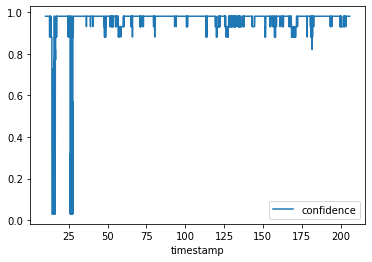

ML0168_1
[131.967]


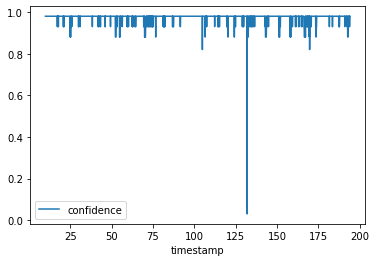

ML0169_1
[61.5, 61.533, 61.567, 61.6, 61.633, 61.667, 61.733, 61.767, 62.033, 62.133, 62.233, 62.433, 62.533, 86.933, 86.967]


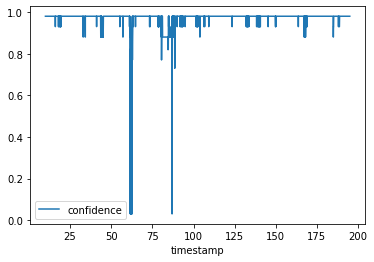

ML0170_1
[87.567, 87.633, 87.667, 87.7, 87.733, 87.767, 87.8, 87.833, 87.867, 87.9, 87.933, 87.967, 88.0, 88.033, 88.067, 88.1, 88.133, 88.167, 88.2, 88.233, 88.267, 88.3, 88.333, 88.367, 88.4, 88.433, 88.467, 88.533, 88.567, 88.6, 88.633, 88.667, 88.7, 88.733, 88.767]


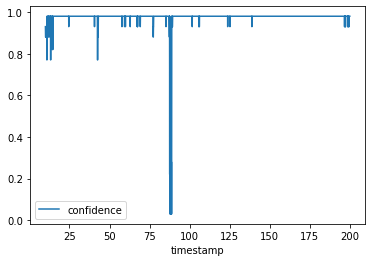

ML0171_1
[104.433, 104.467, 104.567, 104.6, 104.633, 104.667, 104.7, 104.733, 104.767, 104.8, 104.833, 104.867, 104.9, 104.933, 110.633, 112.7, 112.733, 172.0, 172.033, 172.067, 172.1, 172.267, 172.3, 172.333, 173.3, 173.333, 173.367, 175.567, 175.6]


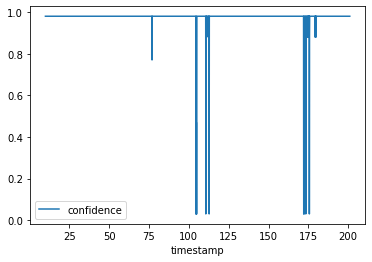

ML0172_1
[]


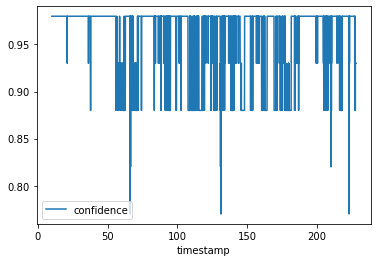

ML0174_1
[174.333, 174.367, 174.4, 174.433, 174.467, 174.5, 174.533, 174.567, 174.6, 174.667, 174.7, 174.733, 174.767, 174.8, 174.833]


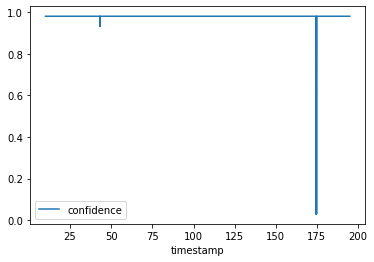

ML0176_1
[]


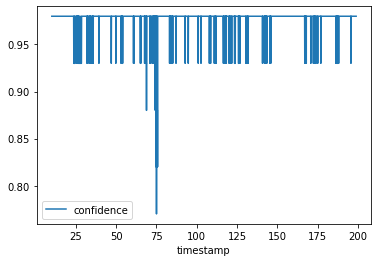

ML0177_1
[28.033, 28.133, 44.6, 44.733, 44.767, 44.8, 44.833, 44.867, 44.9, 44.933, 44.967, 45.0, 45.033, 45.067, 45.1, 45.133, 45.167, 45.2, 45.233, 45.267, 45.3, 45.333, 45.367, 45.4, 45.433, 45.467, 45.5, 45.533, 45.567, 45.6, 45.633, 45.667, 45.7, 45.733, 45.767, 45.8, 45.833, 45.867, 45.9, 45.933, 45.967, 46.0, 46.033, 46.067, 46.1, 46.133, 46.167, 46.2, 46.233, 46.267, 46.3, 46.333, 46.367, 46.4, 46.433, 46.967, 47.0, 47.033, 47.067, 47.1, 47.133, 47.167, 47.2, 47.233, 47.267, 47.3, 47.333, 47.367, 47.4, 47.433, 47.467, 55.167, 55.233, 55.267, 55.3, 55.333, 55.367, 55.4, 55.433, 55.467, 55.567, 55.6, 55.733, 55.767, 55.8, 55.833, 55.867, 55.9, 55.933, 55.967, 56.0, 56.033, 56.067, 56.1, 56.133, 56.167, 56.2, 56.233, 56.333, 68.133, 80.867, 81.0, 81.033, 81.067, 81.1, 81.133, 81.167, 81.2, 81.233, 81.267, 81.3, 81.367, 81.4, 81.433, 81.467, 81.5, 81.533, 81.567, 81.6, 81.633, 82.667, 82.7, 82.8, 89.933, 89.967, 90.0, 90.033, 90.067, 90.1, 90.133, 90.167, 90.2, 90.233, 90.267, 90.3

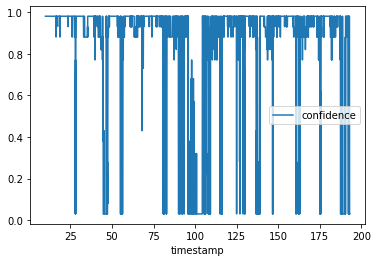

ML0178_1
[]


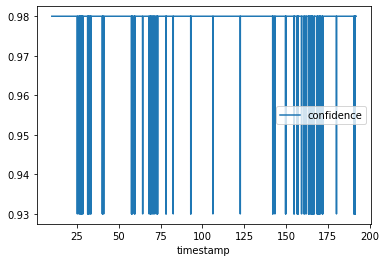

ML0179_1
[13.833, 13.867, 13.9, 13.933, 13.967, 14.0, 14.033, 14.067, 14.1, 14.133, 14.167, 14.2, 14.233, 14.267, 14.3, 14.333, 14.367, 14.4, 14.433, 14.467, 14.5, 14.533, 14.567, 14.6, 14.633, 14.667]


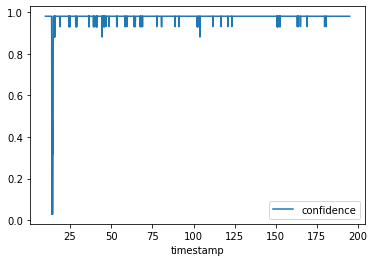

ML0180_1
[15.467, 17.267, 17.3, 17.333, 17.367, 17.867, 17.967, 62.667]


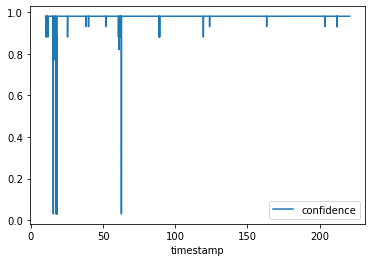

ML0181_1
[]


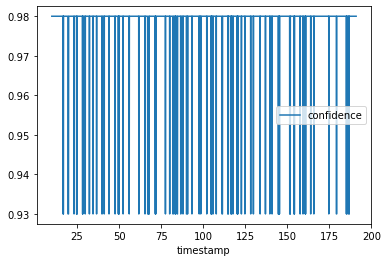

ML0182_1
[42.133, 42.2, 42.233, 42.267, 45.0, 45.1, 45.133, 45.167, 45.233, 45.3, 45.333, 45.367, 45.4, 45.433, 45.467, 45.5, 45.533, 45.567, 45.6, 45.633, 45.667, 45.7, 45.733, 45.767, 45.8, 45.833, 45.867, 45.9, 45.933, 45.967, 46.0, 46.033, 46.067, 46.1, 46.133, 46.167, 46.2, 46.233, 46.267, 46.3, 46.333, 46.367, 46.4, 46.433, 46.467, 46.5, 46.533, 46.567, 46.6, 46.633, 46.667, 46.7, 46.733, 46.767, 46.8, 46.833, 46.867, 46.9, 46.933, 46.967, 47.0, 47.033, 47.067, 47.1, 47.133, 47.167, 47.2, 47.233, 47.267, 47.3, 47.333, 47.367, 47.4, 47.433, 47.467, 47.5, 47.533, 47.567, 47.6, 47.633, 47.667, 47.7, 47.733, 47.767, 47.8, 47.833, 47.867, 47.9, 47.933, 47.967, 48.0, 48.033, 48.067, 48.1, 48.133, 48.167, 48.2, 48.3, 48.333, 48.4, 48.467, 48.6, 48.667, 48.7, 48.733, 48.8, 48.833, 48.867, 48.9, 48.933, 48.967, 49.0, 49.033, 49.067, 49.1, 49.133, 49.167, 49.2, 49.233, 49.267, 49.3, 49.333, 49.367, 49.4, 49.433, 49.467, 49.5, 49.533, 49.567, 49.6, 49.633, 49.667, 49.7, 49.733, 49.767, 49.8

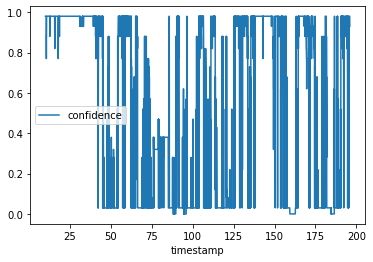

ML0183_1
[]


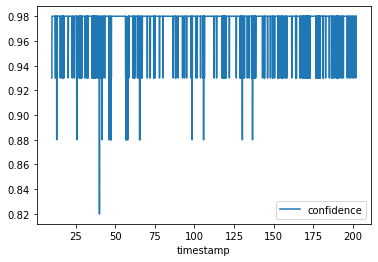

ML0184_1
[95.033, 95.7, 95.767, 95.8, 102.167, 103.133, 103.167, 104.1, 104.167, 104.2, 104.267, 104.433, 104.467, 104.667, 104.7, 104.733, 104.767, 104.8, 104.833, 104.867, 104.9, 104.967, 105.0, 105.033, 105.067, 105.133, 105.167, 105.2, 105.233, 105.267, 105.3, 106.533, 106.7, 106.967, 107.067, 107.1, 107.2, 107.233, 107.267, 107.3, 107.333, 107.367, 107.4, 107.433, 107.467, 107.5, 107.6, 107.633, 107.667, 107.7, 107.733, 107.767, 107.8, 107.833, 107.867, 108.067, 108.367, 108.4, 108.767, 108.867, 110.1, 110.133, 110.167, 110.2, 110.233, 110.267, 110.3, 110.333, 110.367, 110.4, 110.433, 110.467, 110.5, 110.533, 110.567, 110.6, 110.633, 110.667, 110.7, 110.733, 110.767, 110.8, 110.833, 110.867, 110.9, 110.933, 110.967, 111.0, 112.967, 113.167, 113.2, 113.7, 113.733, 113.767, 113.8, 113.867, 114.533, 114.567, 114.6, 114.633, 114.767, 114.8, 114.833, 114.867, 114.9, 114.933, 114.967, 115.0, 115.033, 115.067, 115.1, 115.133, 115.167, 115.2, 115.233, 115.267, 115.3, 115.433, 115.467, 115

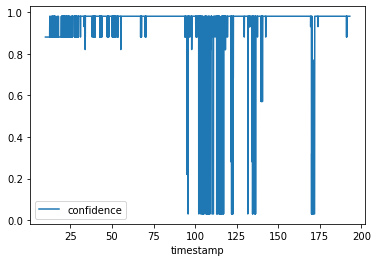

ML0185_1
[117.0, 117.067, 117.1, 117.133, 117.167, 117.2, 117.233, 117.3, 117.333, 117.367, 117.4, 117.433, 117.467, 117.5, 117.533, 117.567, 117.6, 117.633, 117.667, 117.7, 117.733]


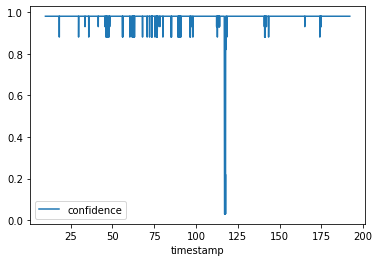

ML0186_1
[43.833, 69.733, 69.767, 69.8, 70.067, 70.1, 70.133, 70.233, 70.733, 70.8, 71.067, 71.2, 71.333, 71.367, 71.733, 71.767, 71.8, 71.833, 71.867, 71.933, 71.967, 72.0, 72.033, 72.067, 72.1, 72.333, 72.733, 72.767, 72.833, 72.867, 72.9, 72.933, 72.967, 73.0, 73.033, 73.067, 73.1, 73.167, 73.267, 73.3, 73.333, 73.4, 73.433, 73.467, 73.5, 73.533, 73.567, 73.6, 73.633, 73.667, 73.7, 73.733, 73.767, 73.8, 73.833, 73.9, 73.933, 74.033, 74.067, 74.1, 74.133, 74.167, 74.233, 74.267, 74.3, 74.333, 74.367, 74.4, 74.433, 74.467, 74.5, 74.533, 74.567, 74.6, 74.633, 74.667, 74.7, 74.767, 74.8, 74.833, 74.867, 74.9, 74.933, 74.967, 75.0, 75.033, 75.067, 75.1, 75.167, 75.2, 75.233, 75.267, 75.3, 75.333, 75.367, 75.4, 75.433, 75.467, 75.5, 75.533, 75.567, 75.6, 75.633, 75.667, 75.7, 75.733, 75.767, 75.8, 75.833, 75.867, 75.9, 75.933, 75.967, 76.0, 76.033, 76.1, 76.133, 76.167, 76.2, 76.233, 76.267, 76.3, 76.333, 76.367, 76.4, 76.433, 76.467, 76.533, 76.567, 76.6, 76.633, 76.667, 76.733, 76.767, 

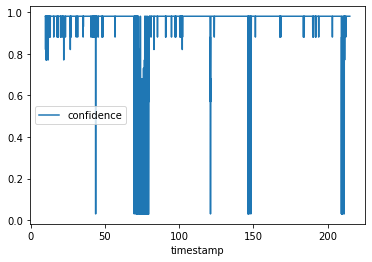

ML0188_1
[17.267, 17.3, 17.333, 17.367, 17.4, 17.433, 17.467, 17.5, 17.533, 17.567, 17.6, 17.633, 17.667, 17.7, 17.733, 17.767, 17.8, 17.833, 17.867, 17.9, 17.967, 18.0, 18.033, 18.1, 18.2, 18.233, 18.3, 18.333, 24.667, 24.767, 24.867, 24.9, 24.967, 25.067, 31.733, 31.767, 32.467, 32.5, 32.533, 32.767, 32.833, 32.9, 32.933, 32.967, 33.0, 33.033, 33.067, 33.1, 33.133, 33.167, 33.2, 33.233, 33.267, 33.3, 33.333, 33.367, 33.4, 33.433, 33.467, 33.5, 33.567, 33.6, 33.633, 33.7, 33.733, 33.767, 33.8, 33.833, 33.867, 33.9, 33.933, 33.967, 34.0, 34.033, 34.067, 35.433, 38.533, 38.567, 38.6, 41.467, 41.533, 41.567, 41.6, 41.633, 41.667, 45.567, 45.6, 45.667, 45.733, 45.767, 45.933, 45.967, 46.167, 46.2, 46.233, 46.267, 46.3, 46.333, 46.367, 46.4, 46.433, 46.467, 46.667, 46.733, 46.767, 46.8, 46.833, 47.433, 47.467, 47.5, 47.533, 47.567, 47.6, 47.633, 47.667, 47.833, 47.867, 47.9, 47.933, 47.967, 48.0, 48.033, 48.067, 48.1, 48.133, 48.167, 48.2, 48.233, 48.267, 48.3, 48.333, 48.367, 48.4, 48.433

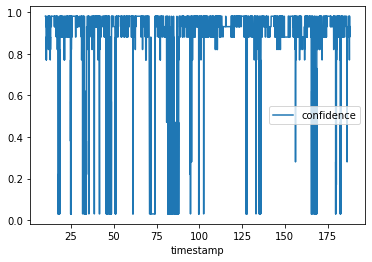

ML0189_1
[]


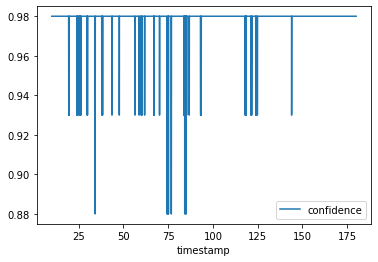

ML0190_1
[115.267]


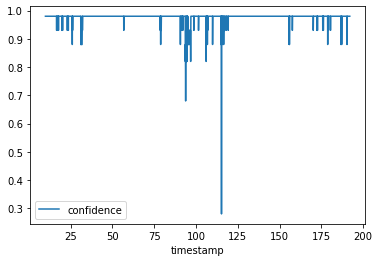

ML0191_1
[179.367, 179.4, 179.467, 179.5, 179.533]


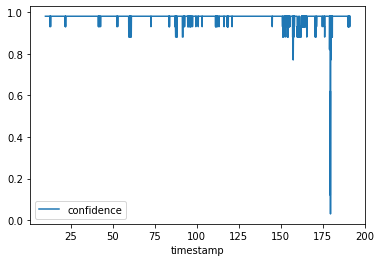

ML0198_1
[70.3, 70.333, 70.367, 70.5]


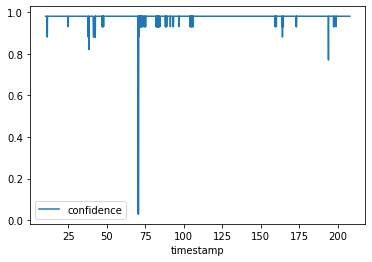

ML0199_1
[172.567, 172.6, 172.633]


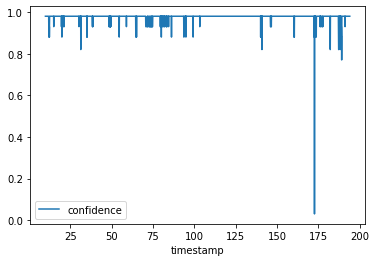

ML0200_1
[31.8, 31.833, 31.867, 31.9, 31.933, 31.967, 32.0, 32.033, 32.067, 32.1, 32.133, 32.167, 32.2, 32.233, 32.267, 32.3, 32.333, 32.367, 32.4, 32.433, 32.467, 32.5, 32.567, 57.533, 57.567, 57.6, 57.633, 57.7, 57.733, 57.767, 57.8, 57.833, 57.867, 57.9, 57.933, 58.0, 58.033, 58.067, 58.1, 58.133, 58.167, 58.2, 58.233, 58.267, 58.3, 58.333, 58.367, 58.4, 58.433, 58.467, 58.5, 58.533, 58.567, 58.6, 58.633, 58.667, 58.7, 58.733, 58.767, 58.8, 58.833, 58.867, 58.9, 58.933, 58.967, 59.0, 59.033, 59.067, 59.1, 59.133, 59.167, 59.2, 59.233, 59.267, 59.3, 59.333, 59.367, 59.4, 59.433, 59.467, 59.5, 59.533, 59.567, 59.6, 59.633, 59.667, 59.7, 59.733, 59.767, 59.833, 59.867, 59.9, 59.933, 59.967, 60.0, 60.033, 60.067, 60.1, 60.133, 60.167, 60.2, 60.233, 60.267, 60.3, 60.333, 60.367, 60.4, 60.433, 60.467, 60.5, 60.533, 60.567, 60.6, 60.633, 60.667, 60.7, 60.733, 60.767, 60.8, 60.833, 60.867, 60.9, 60.933, 60.967, 61.0, 61.033, 61.067, 61.1, 61.133, 61.167, 61.2, 61.233, 61.267, 61.3, 61.333, 

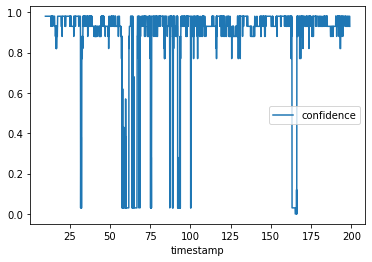

ML0201_1
[129.9, 129.933, 129.967, 130.0, 130.033, 130.067, 130.1, 130.133, 130.167, 130.2, 130.233, 130.267, 130.3, 130.333, 130.367, 130.4, 130.433, 130.467, 130.5, 130.533, 130.567, 130.6, 130.633, 130.667, 130.7, 130.733, 130.767, 130.8, 130.833, 131.2, 135.533, 135.567, 135.633, 135.733, 135.767, 135.8, 135.833, 135.867, 135.9, 135.933, 135.967, 136.0, 136.033, 136.067, 136.1, 136.167, 136.2, 136.233, 136.267, 136.333, 136.367, 136.4, 136.533, 139.433, 140.267, 140.3, 140.533, 140.567, 140.633, 140.8, 140.933, 140.967, 141.0, 141.033, 141.067, 141.1, 141.133, 141.167, 141.2, 141.233, 141.267, 141.3, 141.333, 141.367, 141.4, 141.433, 141.467, 141.533, 141.567, 141.6, 141.633, 141.667, 141.7, 141.733, 141.767, 141.867, 141.933, 141.967, 142.0, 142.033, 142.067, 142.1, 142.133, 142.167, 142.2, 142.233, 142.267, 142.3, 142.333, 142.367, 142.4, 142.433, 142.467, 142.5, 142.533, 142.567, 142.833, 142.867, 142.9, 143.233, 143.3, 143.467, 143.5, 143.533, 143.567, 143.6, 143.633, 143.667, 

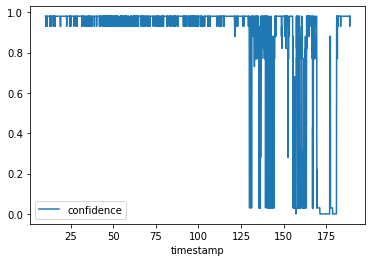

ML0202_1
[]


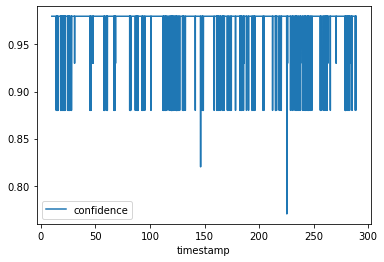

ML0203_1
[48.167, 48.2, 48.267, 48.3, 48.433, 48.467, 48.5, 48.533, 48.567, 48.6, 48.633, 48.667, 48.7, 48.733, 48.767, 48.8, 48.833, 48.867, 48.9, 48.933, 48.967, 49.0, 49.067, 58.4, 58.433, 58.5, 58.567, 58.6, 74.533, 74.567, 74.8, 74.833, 74.867, 74.9, 74.933, 74.967, 75.0, 75.033, 75.067, 75.1, 75.133, 75.167, 75.2, 75.233, 75.267, 75.3, 75.333, 75.367, 75.4, 75.433, 75.467, 75.5, 75.533, 76.033, 76.067, 85.867, 85.9, 85.933, 85.967, 86.0, 86.033, 86.067, 86.1, 86.133, 86.167, 86.2, 86.233, 86.467, 86.533, 86.6, 87.267, 87.333, 87.4, 91.867, 91.9, 92.167, 92.233, 92.267, 92.3, 92.333, 92.367, 92.4, 92.467, 92.5, 92.567, 92.633, 92.667, 92.7, 92.733, 92.767, 103.0, 103.1, 103.2, 103.267, 103.3, 103.667, 103.7, 103.733, 103.767, 103.8, 103.833, 103.9, 107.467, 107.5, 107.533, 107.567, 107.6, 107.633, 107.667, 107.7, 107.733, 107.767, 107.8, 107.833, 107.867, 107.9, 107.967, 108.0, 108.033, 108.067, 108.1, 108.133, 108.167, 108.233, 108.267, 166.133, 166.167, 166.2, 166.233, 166.267, 

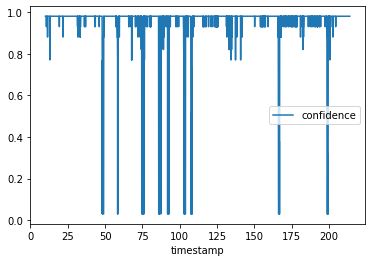

ML0204_1
[]


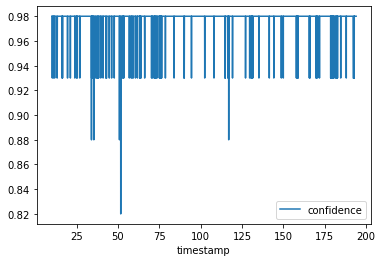

ML0205_1
[13.233, 13.267, 13.3, 13.333, 13.367, 13.4, 13.433, 13.467, 13.5, 13.567, 13.6]


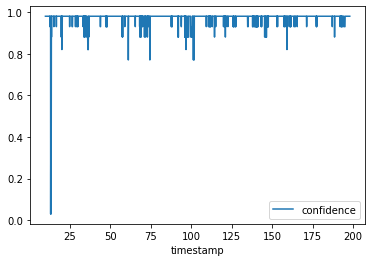

ML0206_1
[80.9, 80.933, 80.967, 81.0, 81.033, 81.067, 81.1, 81.133, 81.167, 81.2, 81.233, 81.267, 81.3, 81.333, 118.967, 119.0, 119.067, 119.133, 119.167, 119.2, 119.233, 119.267, 119.3, 119.333, 119.367, 119.4, 119.433, 119.467, 119.5, 119.533, 119.567, 119.6, 119.633, 119.667, 119.7, 119.733, 119.767, 119.8, 119.833, 119.867, 119.9, 119.933, 119.967, 120.0, 120.067, 120.133, 121.333, 121.367, 121.4, 121.433, 121.5, 121.533, 121.567, 121.6, 121.667, 121.7, 121.767, 121.8, 121.833, 121.867, 121.9]


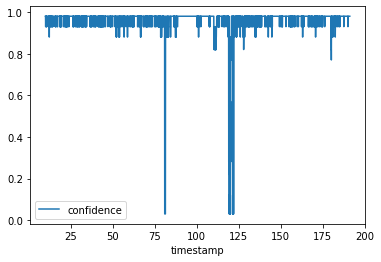

ML0208_1
[35.6, 35.633, 35.733, 35.767, 35.8, 35.833, 35.867, 35.9, 35.933, 35.967, 36.0, 36.033, 36.067, 36.1, 36.133, 36.267, 36.3, 36.333, 36.367, 36.4, 36.433, 36.467, 36.5, 36.533, 36.567, 36.6, 36.633, 36.667, 36.7, 36.733, 36.767, 36.8, 36.833, 36.867, 36.9, 36.933, 36.967, 37.0, 37.033, 37.067, 37.1, 37.133, 37.167, 37.2, 37.233, 37.267, 37.3, 37.333, 37.367, 37.4, 37.433, 37.467, 37.5, 37.533, 37.567, 37.6, 37.633, 37.667, 37.7, 37.733, 37.767, 37.8, 37.833, 37.867, 37.9, 37.933, 113.5, 113.533, 113.567, 113.6, 113.633, 113.667, 113.7, 113.733, 114.0, 114.033, 114.067, 114.1, 114.133, 114.167, 114.2, 114.233, 114.267, 114.3, 114.333, 114.367, 114.4, 114.433, 114.467, 114.5, 114.533, 114.567, 114.6, 114.633, 114.667, 114.7, 114.733, 114.767, 114.8, 114.833, 114.867, 114.9, 114.933, 114.967, 115.0, 115.033, 115.067, 115.1, 115.133, 115.167, 115.2, 115.233, 115.267, 115.3, 115.333, 115.367, 115.4, 115.433, 115.467, 115.5, 115.533, 115.567, 115.6, 115.633, 115.667, 115.7, 115.733,

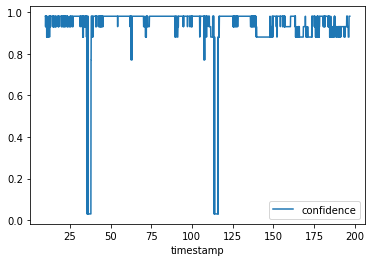

ML0209_1
[22.167, 22.2, 22.267, 42.367, 89.3, 89.333, 89.4, 89.433, 94.133, 94.633, 94.667, 94.7, 94.733, 94.767, 94.8, 94.833, 94.867, 94.9, 94.933, 94.967, 95.0, 95.033, 95.067, 95.1, 95.133, 95.167, 95.2, 95.233, 95.267, 95.3, 95.333, 95.367, 95.4, 95.433, 95.467, 95.5, 95.533, 95.567, 95.6, 95.633, 95.667, 95.7, 95.733, 95.767, 95.8, 95.833, 95.867, 95.9, 95.933, 95.967, 96.0, 96.033, 132.133, 132.167, 132.2, 132.233, 132.267, 132.3, 132.333, 132.367, 132.4, 132.467, 132.533, 132.567, 132.633, 132.7, 132.767, 132.8, 132.833, 132.867, 132.933, 133.033, 133.333, 133.4]


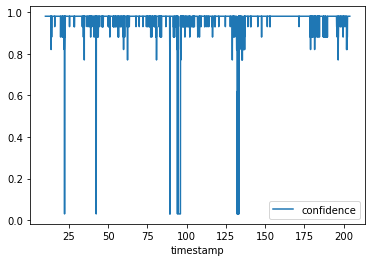

ML0210_1
[]


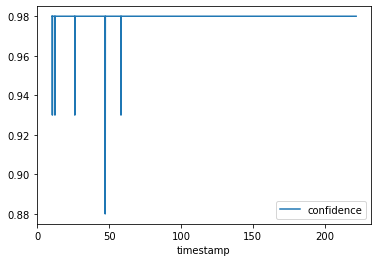

ML0211_1
[21.333, 21.433, 21.5, 21.533, 21.567, 21.6, 21.633, 21.667, 21.7, 21.733, 21.767, 21.8, 21.833, 21.867, 21.9, 21.933, 21.967, 22.0, 22.033, 22.067, 22.1, 59.8, 59.833, 59.867, 59.9, 59.933, 59.967, 60.0, 60.033, 60.067, 60.1, 60.133, 60.167, 60.2, 60.233, 60.267, 60.3, 60.333, 60.367, 60.4, 60.433, 60.467, 60.5, 60.533, 60.567, 60.6, 60.633, 60.667, 60.7, 60.733, 60.767, 60.8, 60.833, 60.867, 60.9, 60.933, 60.967, 61.0, 61.033, 61.067, 61.1, 61.133, 61.167, 61.2, 61.233, 61.267, 61.3, 61.333, 61.367, 61.4, 61.433, 61.467, 61.5, 61.533, 61.567, 61.6, 61.633, 61.667, 61.7, 61.733, 61.767, 61.8, 61.833, 61.867, 61.9, 61.933, 61.967, 62.0, 62.033, 62.067, 62.1, 62.133, 62.167, 62.2, 62.233, 62.267, 62.3, 62.333, 62.367, 62.4, 62.433, 62.467, 62.5, 62.533, 62.567, 62.6, 62.633, 62.667, 62.7, 62.733, 62.767, 62.8, 62.833, 62.867, 62.9, 62.933, 62.967, 63.0, 63.033, 63.067, 63.1, 63.133, 63.167, 63.2, 63.233, 63.267, 63.3, 63.333, 63.367, 63.4, 63.433, 63.467, 63.5, 63.533, 63.567, 

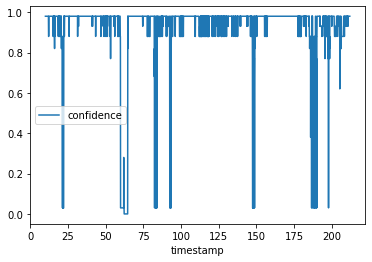

ML0212_1
[]


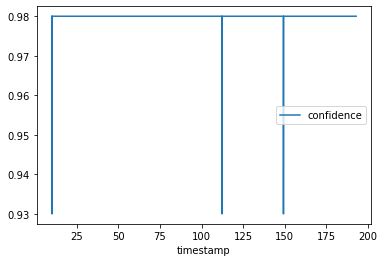

ML0213_1
[87.967, 88.033, 88.067, 88.1, 88.167, 144.733, 144.767, 144.8, 144.833, 144.867, 144.9, 144.933, 144.967, 145.0, 145.033, 145.067, 145.1, 145.133, 145.167, 145.233, 145.267, 145.6, 145.667, 146.033, 151.8, 151.833, 165.733, 165.767, 165.833, 165.867, 165.9, 165.933, 165.967, 166.0, 166.033, 166.067, 166.1, 166.133, 166.167, 166.2, 166.233, 166.267, 166.3, 166.333, 166.367, 166.4, 166.433, 166.467, 166.5, 166.533, 166.567, 166.6, 166.633, 166.667, 166.7, 166.733, 166.767, 166.8, 166.833, 166.867, 166.933, 166.967, 167.0, 167.033, 167.067, 167.1, 167.133, 167.167, 167.2, 167.233, 167.467, 167.5]


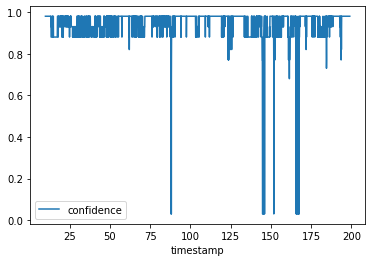

ML0216_1
[]


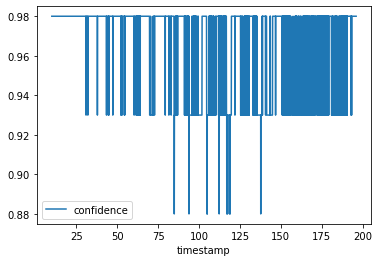

ML0217_1
[23.433, 23.467, 23.5, 23.533, 23.633, 23.667, 23.7, 23.733, 23.767, 23.8, 23.833, 23.867, 23.9, 23.933, 23.967, 24.0, 24.033, 24.067, 24.1, 24.133, 24.167, 24.2, 24.233, 24.267, 24.3, 24.333, 78.267, 78.3, 133.733, 133.767, 133.8, 133.833, 133.867, 133.9, 134.0, 134.033, 136.4, 136.433, 136.467, 136.5, 136.533, 136.567, 136.6, 136.633, 136.667, 136.7, 136.733, 136.767, 136.8, 136.833, 136.867, 137.067, 137.167]


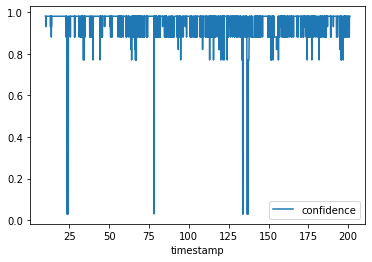

ML0218_1
[41.3]


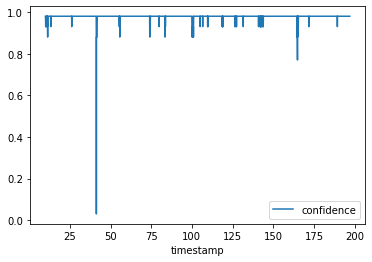

ML0219_1
[51.133, 51.567, 51.7, 51.767, 51.8, 51.833, 51.867, 51.9, 51.933, 52.067, 52.1, 52.133, 52.2, 52.267, 52.3, 52.333, 52.367, 52.4, 52.433, 52.467, 52.5, 52.533, 52.567, 52.6, 52.633, 52.667, 52.7, 52.733, 52.767, 52.8, 52.833, 52.867, 52.9, 52.933, 52.967, 53.0, 53.033, 53.067, 53.1, 53.133, 53.167, 53.2, 53.233, 53.267, 53.3, 53.333, 53.367, 53.4, 53.433, 53.467, 53.5, 53.533, 53.567, 53.6, 53.633, 53.667, 53.7, 53.733, 53.767, 53.8, 53.833, 53.867, 53.9, 53.933, 53.967, 54.0, 54.033, 54.067, 54.1, 54.133, 54.167, 54.2, 54.233, 54.267, 54.3, 54.333, 54.367, 54.4, 54.433, 54.467, 54.5, 54.533, 54.567, 54.6, 54.633, 54.667, 54.7, 54.733, 54.767, 54.8, 54.833, 54.867, 54.9, 54.933, 54.967, 55.0, 55.033, 55.067, 55.1, 55.133, 55.167, 55.2, 55.233, 55.267, 55.3, 55.333, 55.367, 55.4, 55.467, 55.5, 55.533, 55.567, 157.967, 158.0, 158.033, 158.067, 158.1, 158.133, 158.167, 158.2, 158.233, 158.3, 158.333, 158.367, 158.4, 158.433, 158.467, 158.5, 158.533, 158.567, 158.6, 158.633, 158.

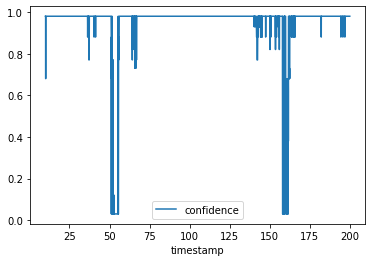

ML0221_1
[]


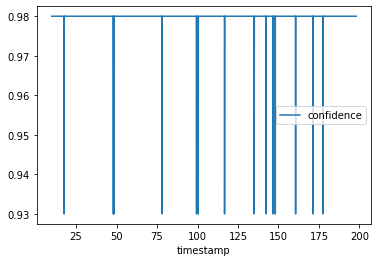

ML0222_1
[]


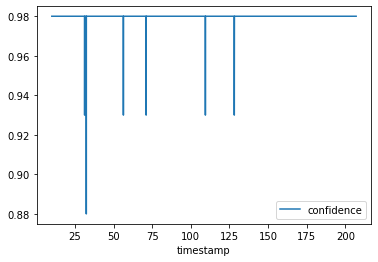

ML0223_1
[39.2, 39.333]


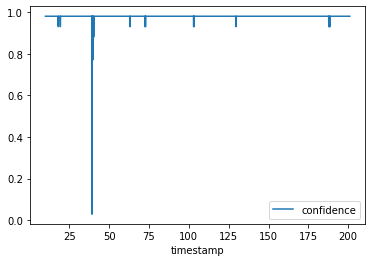

ML0224_1
[]


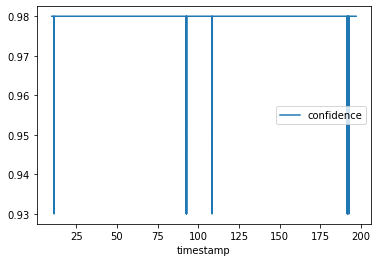

ML0226_1
[21.367, 64.2, 64.233, 161.367, 161.4, 161.433, 161.467, 161.5, 161.533, 161.567, 161.6, 161.633, 161.667, 161.7, 161.733, 161.767, 161.8, 161.833, 161.867, 161.9, 161.933, 161.967, 162.0, 162.133, 162.167, 162.2, 162.233, 162.267, 162.3, 162.333, 162.367, 162.4, 162.433, 162.467, 162.5, 162.533, 162.567, 162.6, 162.633, 162.667, 162.7, 162.733, 190.4, 190.433]


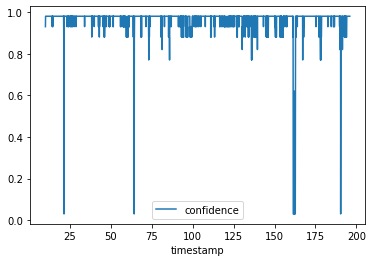

ML0227_1
[]


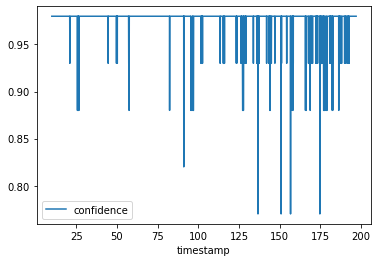

ML0228_1
[157.733, 157.767, 157.8, 157.9, 157.933, 157.967, 158.0, 158.1, 158.133, 158.2, 158.333, 158.367, 158.4, 158.433, 158.467, 159.0, 159.033, 159.1, 159.133, 159.167, 159.2, 159.233, 194.3, 194.333, 194.367, 194.4, 194.533, 195.2, 195.233, 195.467, 195.6, 195.633]


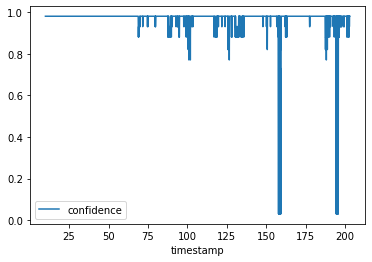

ML0229_1
[45.433, 45.467, 45.567, 45.633, 45.667, 45.7, 45.767, 45.8, 45.833, 45.867, 45.933, 45.967, 46.0, 46.033, 46.067, 46.1, 46.133, 46.267, 46.3, 46.333, 46.367, 46.4, 46.433, 46.467, 46.5, 46.633, 46.967, 47.0, 47.033, 61.767, 61.833, 61.9, 61.933, 61.967, 62.0, 62.133, 62.167, 62.2, 62.233, 62.3, 62.767, 62.867, 62.9, 62.933, 63.033, 63.067, 63.1, 63.133, 63.167, 63.2, 63.233, 63.267, 63.3, 63.333, 63.367, 63.4, 63.433, 63.467, 63.5, 63.533, 63.567, 63.6, 63.633, 63.667, 63.7, 63.733, 67.7, 67.867, 67.9, 79.067, 79.1, 79.133, 79.167, 79.2, 79.267, 79.3, 79.367, 79.4, 79.433, 79.467, 79.5, 79.533, 92.0, 92.033, 92.067, 92.1, 92.133, 92.2, 92.267, 92.3, 92.333, 92.367, 92.4, 92.433, 92.467, 92.5, 92.533, 92.567, 92.867, 92.9, 92.933, 92.967, 93.0, 93.033, 93.067, 93.1, 93.133, 93.167, 93.2, 93.233, 93.267, 101.333, 101.433, 101.467, 101.5, 101.533, 101.567, 101.6, 101.633, 101.667, 101.7, 101.733, 104.633, 104.667, 104.7, 104.733, 104.767, 104.8, 104.833, 104.867, 104.9, 104.933,

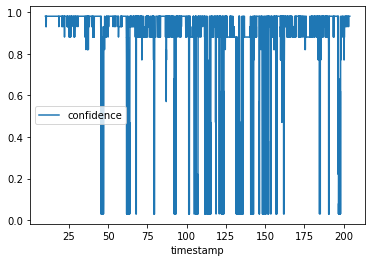

ML0230_1
[12.333, 12.367, 12.4, 12.433, 12.467, 12.5, 12.533, 12.567, 12.6, 12.633, 12.667, 12.7, 12.733, 12.767, 12.8, 12.833, 12.867, 12.9, 12.933, 12.967, 13.0, 13.033, 13.1, 13.133, 13.233, 13.333, 13.4, 13.433, 13.5, 13.533, 13.567, 13.6, 13.633, 13.667, 13.7, 13.733, 13.833, 14.067, 14.1, 14.133, 14.167, 14.2, 14.233, 14.267, 14.3, 14.333, 14.367, 14.4, 14.433, 14.467, 14.5, 14.533, 14.567, 14.6, 14.633, 14.667, 14.7, 14.733, 14.767, 14.8, 14.833, 14.867, 14.9, 14.933, 14.967, 15.0, 15.033, 15.067, 15.1, 15.133, 15.167, 15.2, 15.233, 15.267, 15.3, 15.333, 15.367, 15.4, 15.433, 15.467, 15.5, 15.533, 15.567, 15.6, 15.633, 15.667, 15.7, 15.733, 15.767, 15.8, 15.833, 15.867, 15.9, 15.933, 15.967, 16.0, 16.033, 16.067, 16.1, 16.133, 16.167, 16.2, 16.233, 16.267, 16.3, 16.333, 16.367, 16.4, 16.433, 16.467, 16.5, 16.533, 16.567, 16.6, 16.633, 16.7, 16.733, 16.767, 16.8, 16.833, 16.867, 16.9, 16.933, 16.967, 17.0, 17.033, 17.067, 17.1, 17.133, 17.167, 17.2, 17.233, 17.267, 17.3, 17.333, 

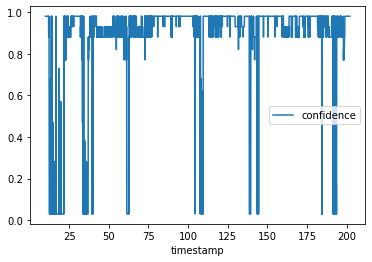

ML0231_1
[10.0, 10.033, 10.067, 10.1, 10.133, 10.267, 10.3, 10.333, 10.367, 10.4, 10.433, 10.467, 10.5, 10.533, 10.567, 10.6, 10.633, 10.667, 10.7, 10.733, 10.767, 10.8, 10.833, 10.867, 10.9, 10.933, 10.967, 11.033, 11.067, 11.133, 11.167, 11.2, 11.233, 11.267, 11.3, 11.333, 11.367, 11.4, 11.433, 11.467, 11.5, 11.533, 11.567, 11.6, 11.633, 11.667, 11.7, 11.733, 11.767, 11.8, 11.833, 11.867, 11.9, 11.933, 11.967, 12.0]


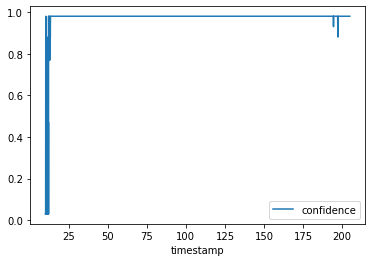

ML0232_1
[29.667, 29.733, 31.533, 31.567, 32.067, 32.1, 32.133, 32.167, 32.2, 32.233, 32.7, 38.133, 38.233, 38.267, 38.3, 38.333, 38.367, 38.4, 38.433, 38.467, 38.5, 38.533, 38.567, 38.7, 38.733, 38.767, 38.8, 38.833, 38.867, 38.9, 39.033, 39.133, 41.333, 41.7, 41.733, 41.767, 41.8, 41.833, 41.867, 41.9, 41.933, 42.067, 42.1, 42.133, 42.167, 42.367, 42.467, 42.733, 43.967, 44.767, 44.833, 44.9, 44.967, 45.033, 45.1, 46.8, 47.3, 47.333, 47.367, 47.433, 47.633, 50.3, 51.4, 52.033, 52.067, 53.3, 54.967, 55.033, 55.1, 55.8, 55.833, 55.867, 55.9, 55.933, 55.967, 56.0, 56.133, 56.267, 56.333, 56.4, 56.433, 56.467, 56.5, 56.533, 56.567, 56.6, 56.667, 63.167, 63.233, 65.6, 65.633, 65.667, 65.7, 65.733, 65.767, 65.8, 65.933, 65.967, 66.0, 66.033, 66.067, 66.1, 66.133, 66.167, 66.2, 66.233, 66.267, 66.3, 66.5, 66.633, 66.7, 66.767, 66.8, 66.833, 67.467, 67.533, 67.6, 70.1, 70.167, 70.233, 70.3, 70.367, 70.5, 70.667, 70.933, 70.967, 71.0, 71.033, 71.067, 71.1, 71.133, 71.167, 71.2, 71.267, 71.3, 

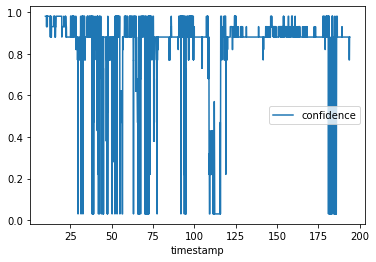

ML0234_1
[]


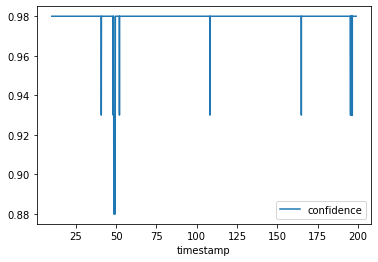

ML0235_1
[33.267, 33.3, 33.333, 33.4, 33.433, 33.467, 33.5, 33.533, 33.567, 33.6, 33.633, 33.667, 33.7, 33.733, 33.767, 33.8, 33.833, 37.433, 37.467, 37.5, 37.533, 37.567, 37.6, 37.633, 37.667, 37.7, 37.733, 37.767, 37.8, 37.833, 37.867, 37.9, 37.933, 42.133, 42.167, 42.233, 42.267, 42.3, 42.333, 42.367, 42.4, 42.567, 42.6, 42.633, 42.667, 42.7, 42.733, 42.767, 42.8, 42.833, 42.867, 42.9, 49.267, 49.3, 49.333, 71.133, 71.167, 71.2, 71.233, 71.267, 71.3, 71.333, 71.367, 83.667, 83.7, 83.733, 83.767, 83.8, 83.833, 83.867, 83.9, 83.933, 83.967, 84.0, 84.033, 84.067, 84.1, 84.133, 84.167, 84.2, 84.233, 84.267, 84.3, 84.333, 84.367, 84.4, 84.433, 84.467, 84.5, 84.533, 84.567, 84.6, 84.633, 84.667, 86.3, 86.333, 86.367, 86.4, 86.433, 87.967, 88.0, 88.033, 88.067, 88.1, 88.133, 97.4, 97.7, 97.767, 97.833, 98.0, 98.033, 98.067, 98.1, 98.133, 98.167, 98.233, 98.267, 126.033, 126.067, 126.133, 126.167, 126.2, 126.233, 126.267, 126.3, 126.333, 126.367, 126.4, 126.433, 126.467, 126.5, 126.533, 126

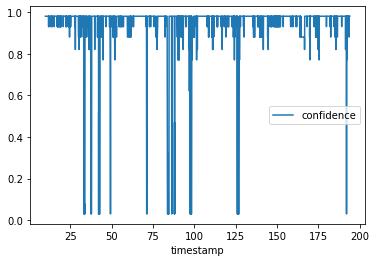

ML0236_1
[]


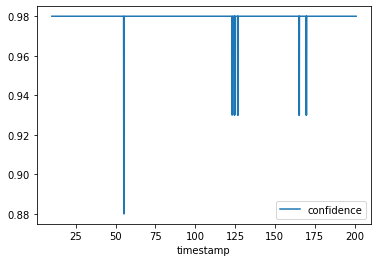

ML0238_1
[42.167, 42.2, 42.233, 42.267, 42.3, 42.333, 42.367, 42.4, 42.433, 42.5, 42.533, 42.567, 42.6, 42.633, 42.667, 42.7, 42.733, 42.767, 42.8, 42.833, 42.867, 42.9, 42.933, 42.967, 43.0, 43.033, 43.067, 43.1, 43.133, 43.167, 43.2, 43.233, 43.7, 45.367, 45.4, 45.433, 45.467, 45.567, 45.6, 45.633, 45.7, 45.733, 45.767, 45.8, 45.867, 45.9, 45.933, 45.967, 46.0, 46.233, 46.267, 46.333, 46.367, 46.4, 46.433, 46.667, 46.733, 46.767, 46.8, 46.833, 46.867, 46.9, 46.933, 46.967, 47.0, 47.033, 51.933, 51.967, 52.0, 52.033, 52.067, 52.1, 52.133, 52.167, 52.2, 52.233, 52.267, 52.3, 52.333, 52.367, 52.4, 52.433, 52.467, 52.5, 52.533, 52.567, 52.6, 52.633, 52.667, 52.7, 52.733, 76.567, 76.6, 76.633, 76.667, 76.7, 76.733, 86.1, 86.167, 86.2, 86.233, 86.267, 86.3, 86.333, 86.367, 86.4, 86.433, 86.467, 86.5, 86.533, 86.567, 86.6, 86.633, 86.667, 86.7, 86.733, 86.767, 86.8, 86.833, 86.867, 86.9, 86.933, 86.967, 87.0, 87.033, 87.067, 87.1, 87.133, 87.167, 87.2, 87.233, 87.267, 87.3, 87.333, 87.367, 

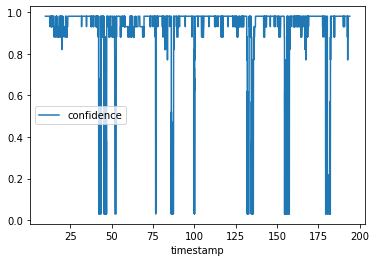

ML0239_1
[12.333, 12.633, 12.667, 24.167, 24.2, 24.233, 24.267, 24.3, 24.333, 24.367, 24.4, 24.433, 24.467, 24.5, 24.533, 24.567, 24.6, 24.633, 24.667, 24.7, 24.733, 24.767, 24.8, 24.833, 24.867, 24.9, 24.933, 24.967, 25.0, 25.033, 25.067, 25.1, 25.133, 25.167, 25.2, 25.233, 25.267, 25.3, 25.333, 25.367, 25.4, 25.433, 25.467, 25.5, 25.533, 25.567, 25.6, 25.633, 25.667, 25.7, 25.733, 25.767, 25.8, 25.833, 25.867, 25.9, 25.933, 25.967, 26.0, 26.033, 26.067, 26.1, 26.133, 26.167, 26.2, 26.233, 26.267, 26.3, 26.333, 26.367, 26.4, 26.433, 26.467, 26.5, 26.533, 26.567, 26.6, 26.633, 26.667, 28.067, 28.133, 28.2, 28.233, 28.267, 28.333, 28.367, 28.433, 28.467, 28.5, 28.533, 28.567, 29.233, 29.4, 29.533, 29.6, 29.667, 39.533, 41.167, 41.2, 41.5, 41.533, 41.567, 41.6, 41.633, 41.667, 41.7, 41.733, 41.767, 41.8, 41.833, 41.867, 41.9, 41.933, 41.967, 42.0, 42.033, 42.067, 42.133, 85.367, 85.4, 85.433, 85.467, 85.5, 85.533, 85.567, 85.6, 85.633, 85.667, 85.7, 85.733, 85.767, 85.8, 85.833, 85.867, 

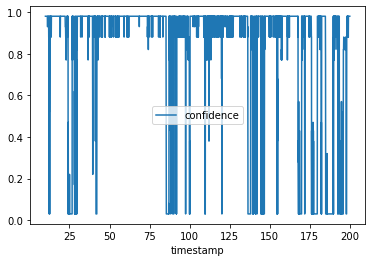

ML0240_1
[10.0, 10.033, 10.067, 10.1, 10.133, 10.167, 10.233, 10.267, 10.4, 10.433, 11.633, 11.667, 11.7, 11.733, 11.767, 11.8, 11.833, 11.867, 11.9, 11.933, 11.967, 12.0, 12.033, 12.067, 12.1, 12.133, 13.7, 13.733, 13.767, 13.8, 13.833, 13.867, 13.9, 13.933, 13.967, 14.0, 14.033, 14.067, 14.1, 14.133, 14.167, 14.2, 14.267, 16.333, 16.367, 16.4, 16.433, 16.467, 16.5, 16.533, 16.6, 16.633, 17.867, 17.9, 17.933, 17.967, 18.0, 18.033, 18.067, 18.1, 18.133, 18.167, 18.2, 18.233, 18.267, 18.3, 18.333, 18.367, 18.4, 18.433, 18.467, 18.7, 18.733, 18.8, 18.867, 19.733, 19.767, 19.8, 19.833, 19.867, 19.9, 19.933, 19.967, 20.0, 20.033, 20.067, 20.1, 20.133, 20.167, 20.2, 20.233, 20.267, 20.3, 20.333, 20.367, 20.4, 20.433, 20.667, 20.7, 20.867, 21.733, 21.767, 21.8, 21.833, 21.867, 21.9, 21.933, 21.967, 22.0, 22.033, 22.067, 22.1, 22.133, 22.167, 22.567, 23.6, 23.633, 23.667, 23.7, 23.733, 23.767, 23.8, 23.833, 23.867, 23.9, 23.933, 23.967, 24.033, 24.067, 24.1, 24.133, 24.167, 24.2, 24.233, 28.0

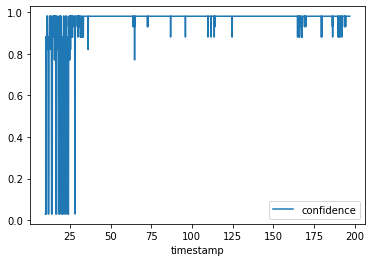

ML0241_1
[50.433]


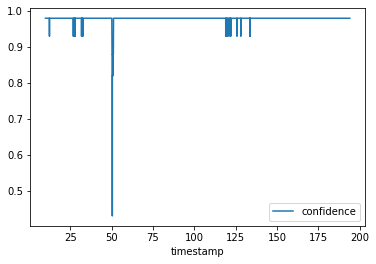

ML0242_1
[]


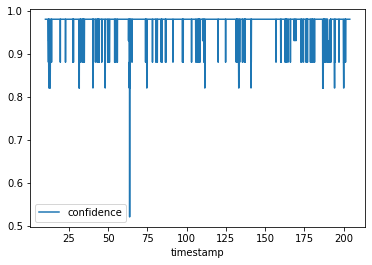

ML0243_1
[]


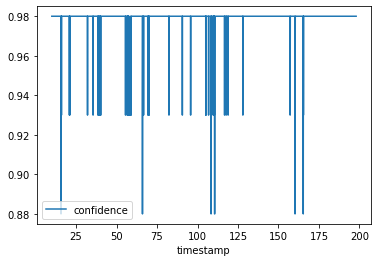

ML0245_1
[]


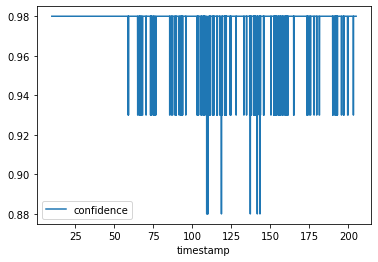

ML0246_1
[]


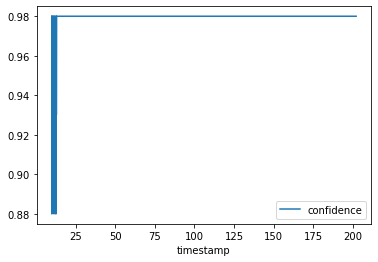

ML0247_1
[]


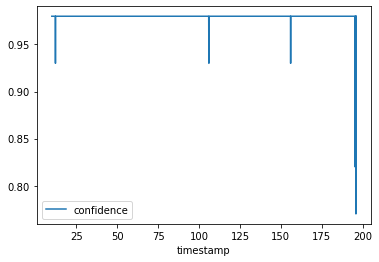

ML0248_1
[56.267, 58.1, 58.2, 58.233, 58.267, 58.3, 58.333, 58.367, 58.4, 58.467, 58.5, 58.533, 58.567, 58.833, 58.867, 58.967, 59.0, 59.033, 59.1, 59.133, 59.167, 59.2, 59.233, 83.233, 83.267, 83.3, 83.333, 83.367, 83.4, 83.433, 83.467, 83.5, 83.533, 83.567, 83.6, 83.633, 83.667, 83.7, 83.733, 83.8, 83.833, 83.9, 83.933, 83.967, 84.0, 84.067, 84.1, 84.133, 84.167, 84.2, 84.233, 84.267, 84.3, 84.333, 84.367, 84.4, 84.433, 84.467, 84.5, 84.533, 84.567, 84.6, 84.633, 84.667, 84.7, 84.733, 84.767, 84.8, 84.833, 84.867, 84.933, 85.333, 85.367, 85.4, 85.433, 85.467, 85.5, 85.533, 85.567, 85.6, 85.633, 85.667, 85.7, 85.733, 85.767, 85.8, 85.833, 85.867, 85.9, 85.933, 85.967, 86.0, 86.033, 86.067, 86.1, 86.133, 86.167, 86.2, 86.233, 86.267, 86.3, 86.333, 86.367, 86.4, 86.433, 86.467, 86.5, 86.533, 86.567, 86.6, 86.633, 86.667, 86.7, 86.733, 86.767, 86.8, 86.833, 86.867, 86.9, 86.933, 86.967, 87.0, 87.033, 87.067, 87.1, 87.133, 87.167, 87.2, 87.233, 87.267, 87.3, 87.333, 87.367, 87.4, 87.433, 

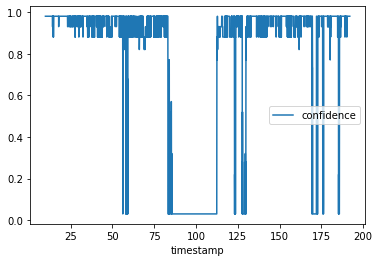

ML0249_1
[]


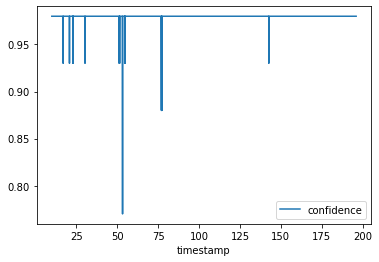

ML0250_1
[42.833, 42.867, 42.9, 42.933, 42.967, 43.367, 43.433, 43.5, 135.333, 135.367, 135.4, 135.433, 135.467, 135.5, 135.533, 135.867, 135.9, 149.433, 149.467]


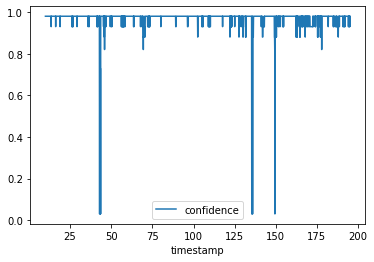

ML0252_1
[]


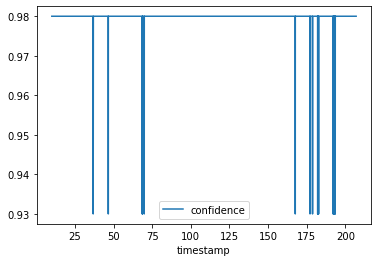

ML0253_1
[174.067, 174.1, 174.833, 175.0, 175.1, 175.133, 175.167, 175.2, 175.233, 175.267, 175.3, 175.333, 175.367, 175.4, 175.433, 175.467, 175.5, 175.533, 175.567, 175.6, 175.633, 175.667, 175.7, 175.733, 175.767, 175.8, 175.833, 175.867, 175.9, 175.933, 176.033, 176.167, 176.733, 176.767, 176.8, 176.867, 176.9, 176.933, 176.967, 177.0, 177.033, 177.067, 177.1, 177.133, 177.167, 177.433, 177.567, 177.867, 177.9, 204.033]


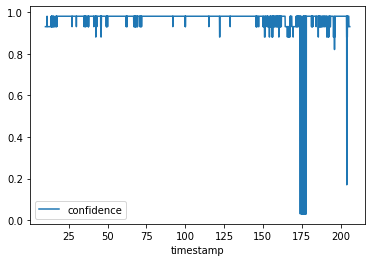

ML0254_1
[]


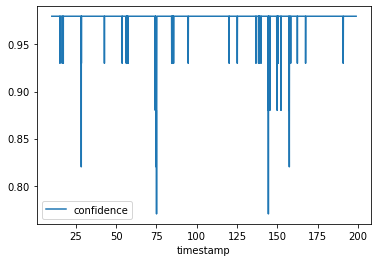

ML0255_1
[99.9, 99.933, 100.033, 100.067, 100.133, 163.867, 163.9, 163.933, 163.967, 164.0, 164.033, 164.067, 164.1, 164.133, 164.167, 164.2, 164.233, 164.267, 164.3, 164.333, 164.367, 164.4, 164.433, 164.467, 164.5, 164.533, 164.567, 164.6, 164.633, 164.667, 164.7, 164.733, 164.767, 164.8, 164.833, 164.867, 164.9, 164.933, 164.967, 165.0, 165.033, 165.067, 165.1, 165.133, 165.167, 165.2, 165.233, 165.267, 165.3, 197.6, 197.767, 197.8, 197.833, 197.867, 197.9, 197.933, 197.967, 198.0, 198.033, 198.067, 198.1, 198.133, 198.167, 198.2, 198.233, 198.267, 198.3, 198.333, 198.367, 198.4, 198.433, 198.467, 198.5, 198.533, 198.567, 198.6, 198.633, 198.667, 198.7, 198.733, 198.767, 198.8, 198.833, 198.867, 198.9, 198.933, 198.967, 199.0, 199.033, 199.067, 199.1, 199.133, 199.167, 199.2, 199.233, 199.267]


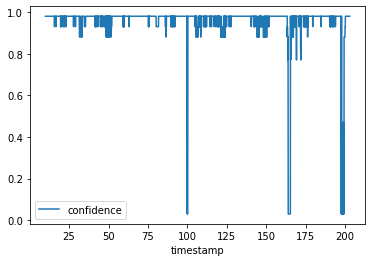

ML0256_1
[27.3, 27.333, 27.367, 27.4, 36.067, 36.6, 36.867, 64.4, 64.5, 133.133, 133.167, 133.867, 133.9, 137.667, 137.7, 138.033, 138.067, 138.1, 138.133, 192.633, 192.667, 192.8, 192.833, 193.033, 193.067, 193.1, 193.133, 193.167, 193.2, 193.233, 193.267]


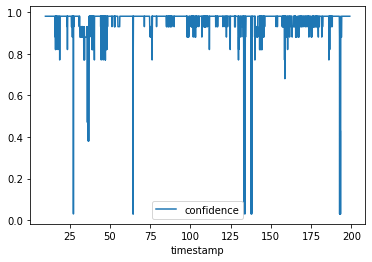

ML0257_1
[10.167, 81.033, 81.067, 81.1, 81.133]


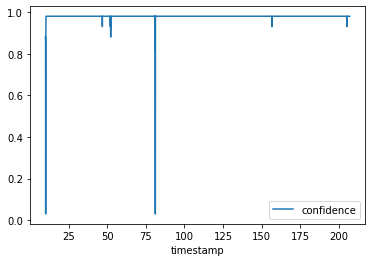

ML0259_1
[]


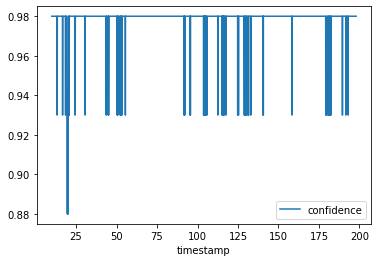

ML0263_1
[]


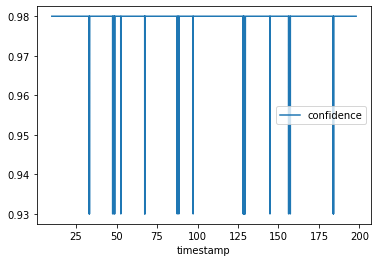

ML0264_1
[59.9, 59.967, 60.0, 60.067, 60.1, 60.167, 60.2, 60.267, 60.3]


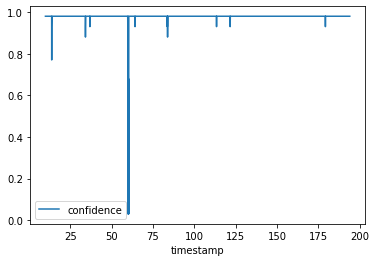

ML0265_1
[144.867, 144.9, 144.933, 144.967, 145.033, 145.067, 145.1, 145.167, 145.2, 145.233, 145.267, 145.3, 145.333, 145.367, 145.4, 145.567, 145.6, 145.633, 145.667, 145.7, 145.733, 145.767, 145.8, 145.833, 145.867, 145.9, 145.933, 145.967, 146.0, 146.033, 146.067, 146.1, 146.133, 146.167, 146.2, 146.233, 146.267, 146.3, 146.333, 146.367, 146.4, 146.433, 146.467]


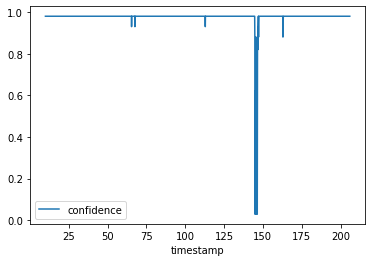

ML0266_1
[37.567, 37.6, 48.667, 48.7, 48.733, 50.333, 50.367, 50.4, 50.433, 50.467, 50.5, 50.533, 50.567, 50.6, 51.2, 51.233, 51.4, 51.433, 51.467, 51.5, 51.533, 51.567, 51.6, 72.533, 72.567, 72.6, 72.633, 72.667, 72.7, 72.733, 72.767, 72.8, 72.833, 72.867, 72.9, 72.933, 72.967, 76.5, 76.533, 76.567, 76.6, 76.633, 76.667, 76.7, 76.767, 76.8, 76.833, 76.867, 76.9, 76.933, 77.0, 77.067, 77.1, 77.133, 77.167, 77.2, 77.233, 77.267, 77.3, 77.333, 77.367, 77.5, 77.533, 77.567, 77.6, 77.633, 77.667, 77.7, 77.733, 77.767, 78.133, 78.167, 86.267, 86.3, 86.333, 86.367, 115.367, 115.467, 115.5, 115.533, 115.567, 115.6, 115.633, 115.667, 115.7, 115.933]


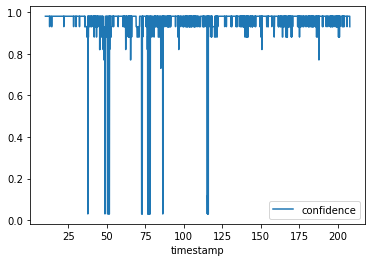

ML0267_1
[170.1, 170.567, 170.6]


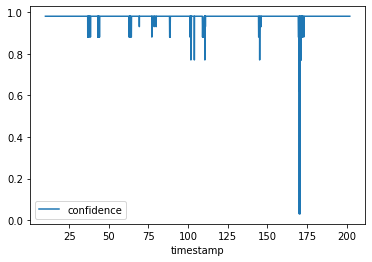

ML0268_1
[]


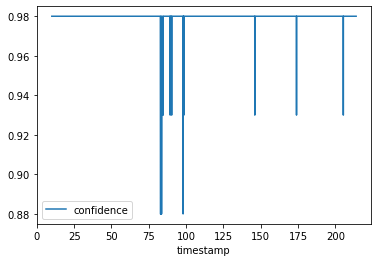

ML0269_1
[75.933, 75.967, 76.8, 85.9, 85.933, 85.967, 86.0, 86.033, 86.067, 86.1, 86.133, 86.167, 86.2, 86.267, 98.767, 98.8, 98.833, 98.867, 98.9, 98.933, 98.967, 99.0, 99.033, 99.067, 99.1, 99.133, 99.167, 99.2, 99.233, 99.267, 99.3, 99.333, 99.367, 99.4, 99.433, 99.467, 99.5, 99.533, 99.567, 99.6, 99.633, 99.667, 99.7, 99.733, 99.767, 99.8, 99.833, 99.867, 99.9, 99.933, 99.967, 100.0, 100.033, 100.067, 100.1, 100.133, 100.167, 100.2, 100.233, 100.267, 100.3, 100.333, 100.367, 100.4, 100.433, 100.467, 100.5, 100.533, 100.567, 100.6, 100.633, 100.667, 100.7, 100.733, 100.767, 100.8, 100.833, 100.867, 100.9, 100.933, 100.967, 101.0, 101.033, 101.067, 101.1, 101.133, 101.167, 101.2, 101.233, 101.267, 101.3, 101.333, 101.367, 101.4, 101.433, 101.467, 101.5, 101.533, 101.567, 101.6, 101.633, 101.667, 101.7, 101.733, 101.767, 101.8, 101.833, 101.867, 101.9, 101.933, 101.967, 102.0, 102.033, 102.067, 102.1, 102.133, 102.167, 102.2, 102.233, 102.267, 102.3, 102.333, 102.367, 102.4, 102.433, 

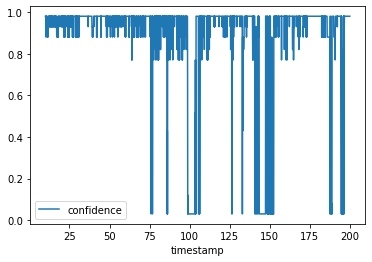

ML0270_1
[14.033, 14.067, 14.133, 14.167, 14.2, 14.233, 14.267, 14.3, 14.333, 14.367, 14.4, 14.433, 14.467, 14.5, 14.533, 14.567, 14.6, 14.633, 14.667, 14.7, 14.733, 14.767, 14.833, 137.533, 137.567, 137.6, 137.633, 142.933, 143.0, 143.033, 143.067, 143.1, 143.133, 143.167, 143.2, 143.233, 143.267, 143.3, 143.333, 143.367, 143.4, 143.533, 146.533, 147.367, 147.4, 147.433, 147.467, 147.5, 147.533, 147.567, 147.6, 147.633, 147.667, 147.7, 147.733, 147.767, 147.8, 147.833, 147.967, 148.0, 148.033, 148.067, 148.1, 148.133, 152.2, 152.233, 152.3, 152.333, 152.4, 152.433, 152.467, 152.5, 152.967, 153.0, 153.033, 153.067, 153.1, 154.2, 154.233, 154.267, 154.3, 154.333, 157.867, 157.9, 157.933, 157.967, 158.0]


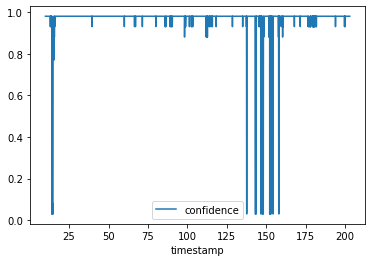

ML0272_1
[]


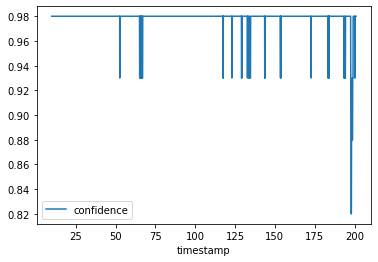

ML0273_1
[5.839]


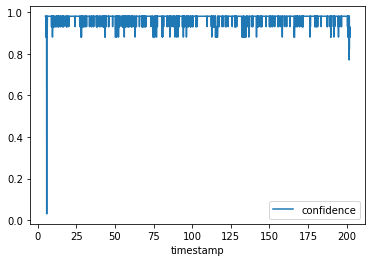

ML0274_1
[10.727, 10.744, 10.761, 10.777, 10.794, 10.811, 10.827, 10.844, 83.166]


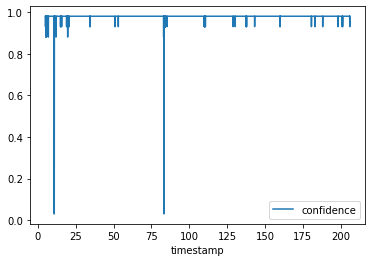

ML0275_1
[]


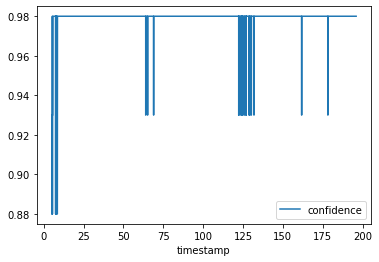

ML0276_1
[]


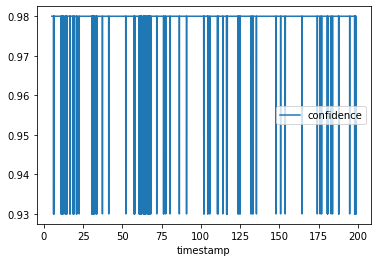

ML0277_1
[]


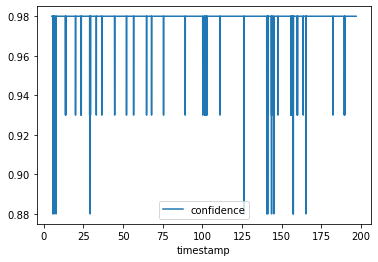

ML0278_1
[]


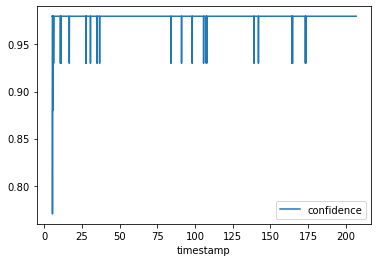

ML0279_1
[]


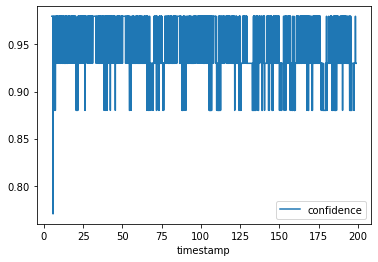

ML0280_1
[]


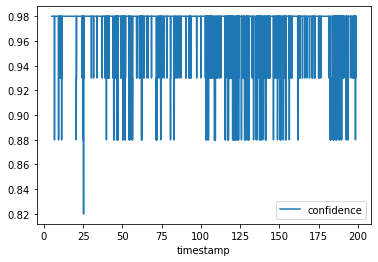

ML0281_1
[]


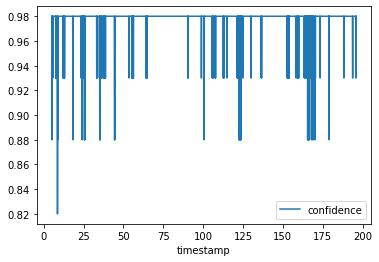

ML0282_1
[]


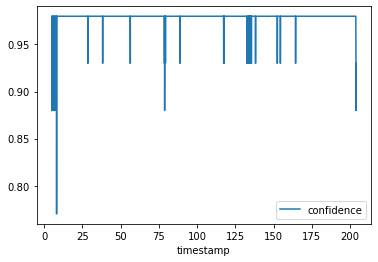

ML0283_1
[]


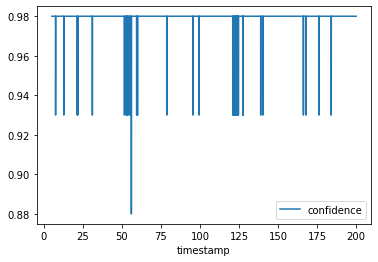

ML0284_1
[]


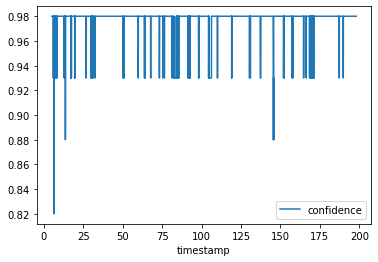

ML0285_1
[]


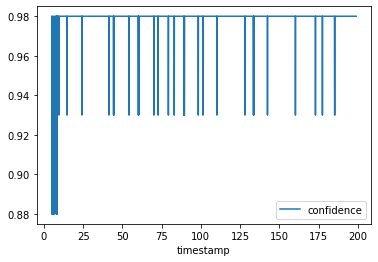

ML0286_1
[]


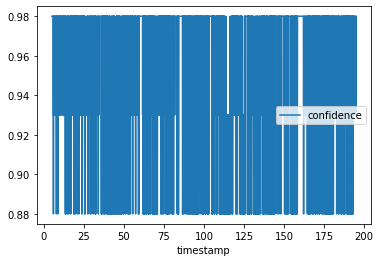

ML0287_1
[]


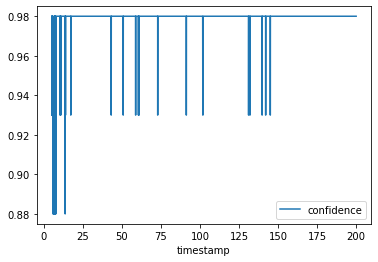

ML0288_1
[]


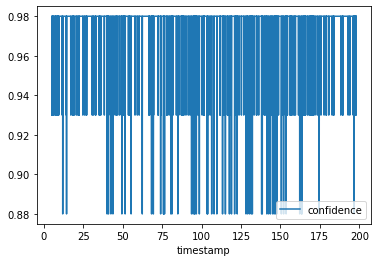

ML0289_1
[]


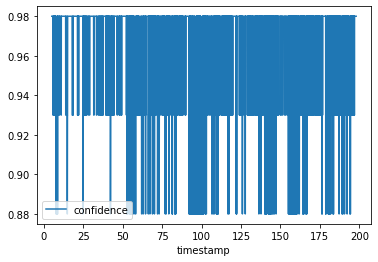

ML0291_1
[]


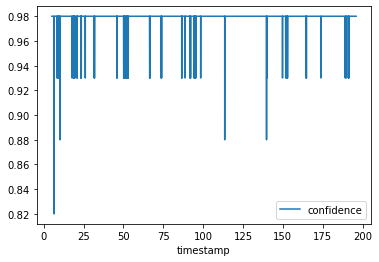

ML0292_1
[]


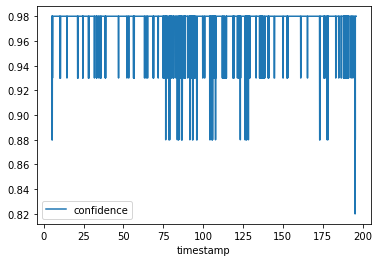

ML0293_1
[190.657, 190.674, 190.691, 190.707, 190.724, 190.741, 190.757, 190.774, 190.791, 190.807, 190.824, 190.841, 190.857, 190.874, 190.891, 190.907, 190.924, 190.941, 190.957, 190.974, 190.991, 191.007, 191.024, 191.041, 191.058, 191.074, 191.091, 191.108, 191.124, 191.141, 191.158, 191.174, 191.191, 191.208, 191.224, 191.241]


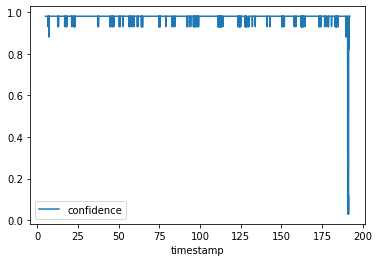

ML0294_1
[]


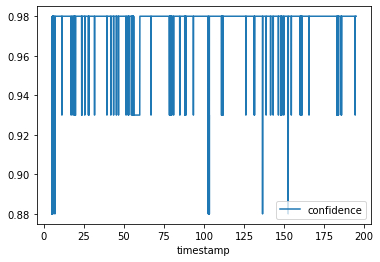

ML0295_1
[]


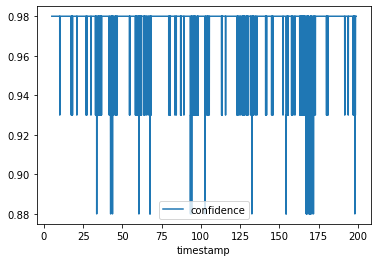

ML0296_1
[45.095, 45.162]


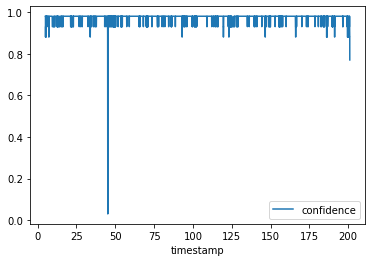

ML0297_1
[]


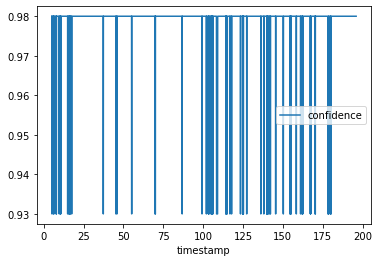

ML0298_1
[]


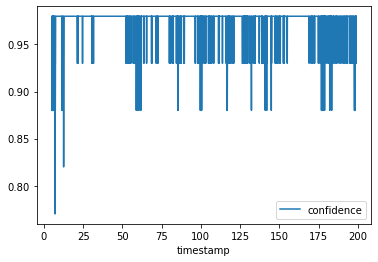

ML0299_1
[]


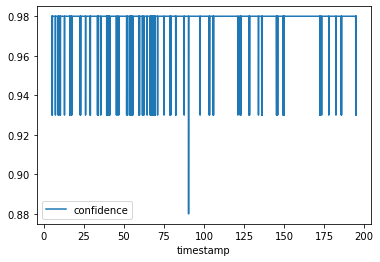

ML0300_1
[83.8, 194.194, 194.211, 194.678, 194.695, 194.711, 194.728, 194.745, 194.761, 194.778, 194.795, 194.811, 194.828, 194.961, 194.978, 194.995]


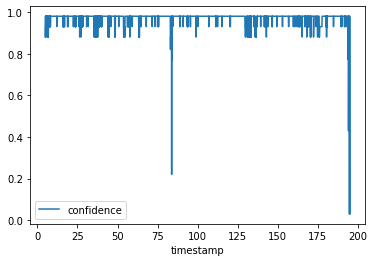

ML0301_1
[]


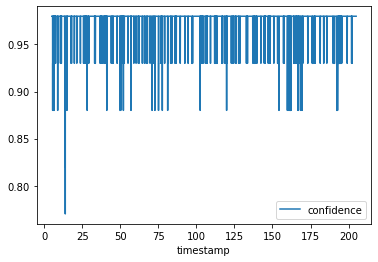

ML0302_1
[161.361]


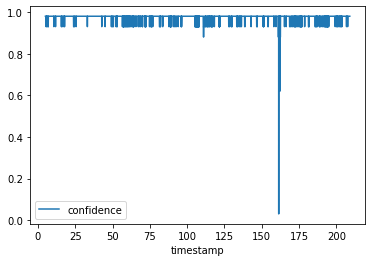

ML0303_1
[]


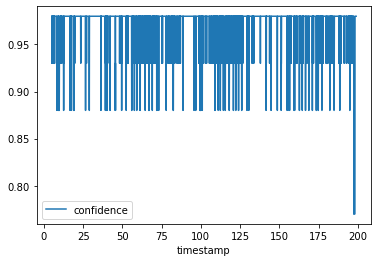

ML0304_1
[]


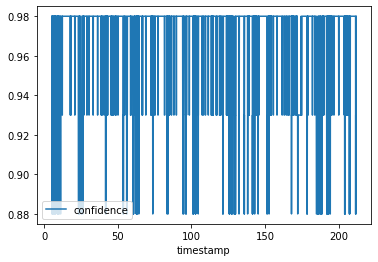

ML0305_1
[]


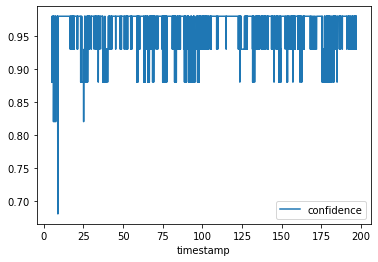

ML0306_1
[]


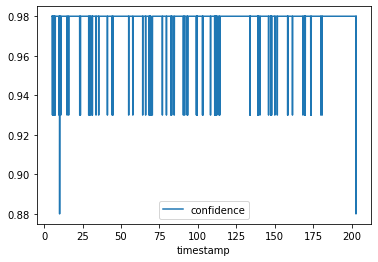

ML0307_1
[]


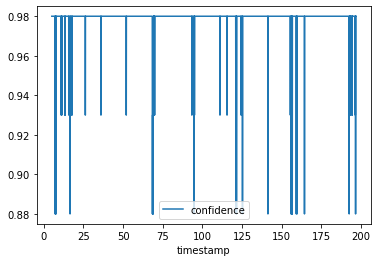

ML0308_1
[]


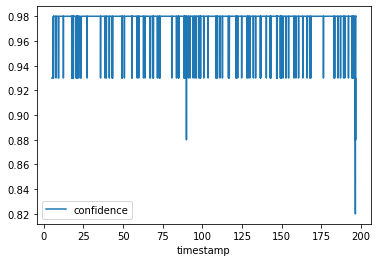

ML0309_1
[]


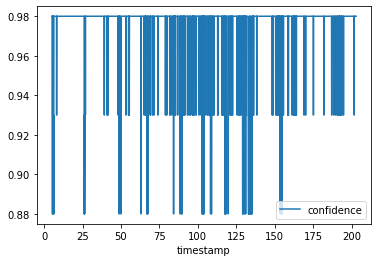

ML0310_1
[]


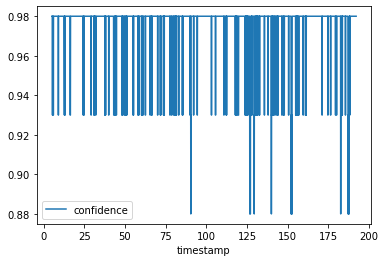

ML0311_1
[]


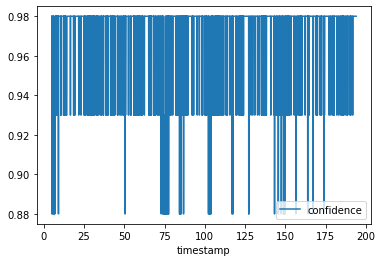

ML0312_1
[51.168, 51.184, 51.201, 51.218, 51.235, 51.251, 51.518, 51.535, 51.552, 51.568, 51.585, 51.602, 51.618, 153.87, 153.937, 153.97, 153.987]


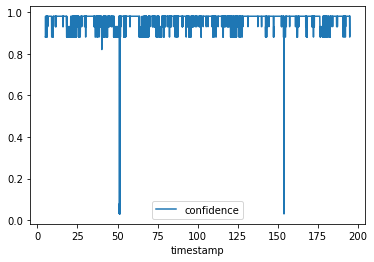

ML0313_1
[196.78, 196.797, 196.83, 196.847, 196.93]


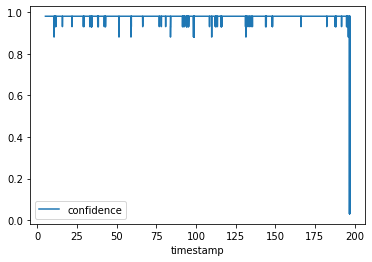

ML0314_1
[]


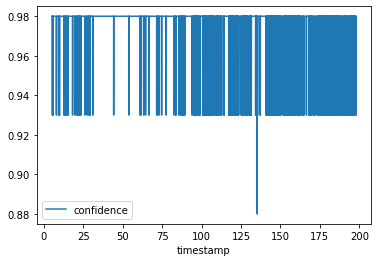

ML0315_1
[]


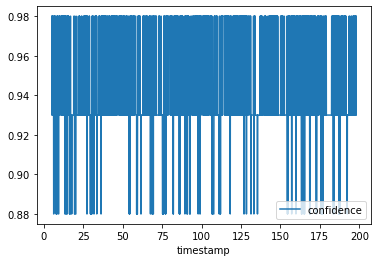

ML0316_1
[]


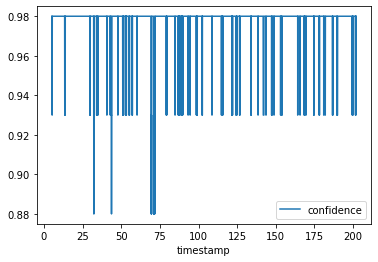

ML0317_1
[]


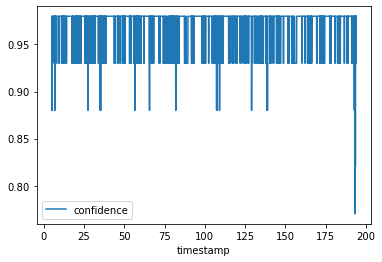

ML0318_1
[]


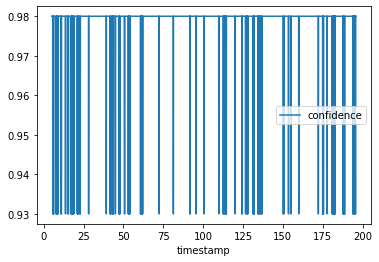

ML0319_1
[]


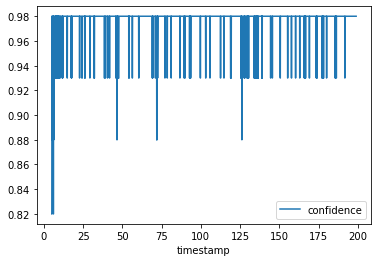

ML0320_1
[63.113, 63.614, 63.897, 63.981, 63.997, 112.679, 112.696, 122.022]


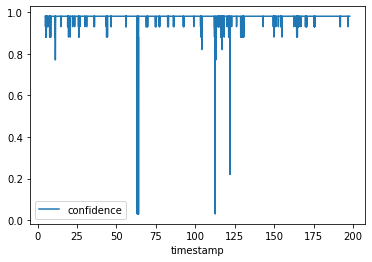

ML0321_1
[]


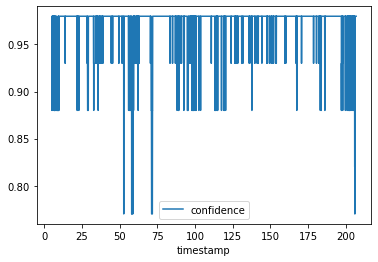

ML0322_1
[]


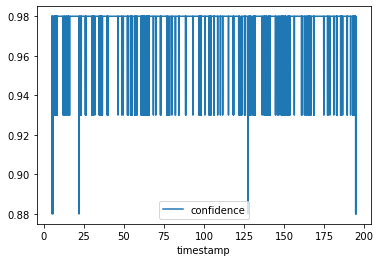

ML0323_1
[]


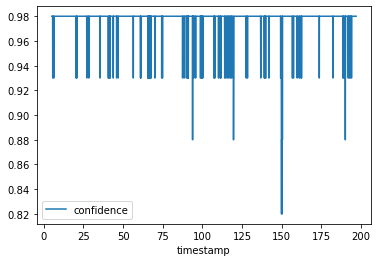

ML0324_1
[]


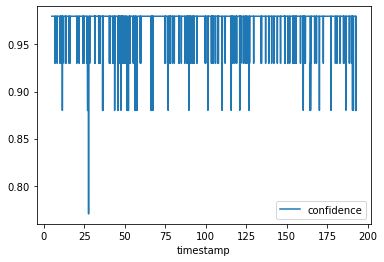

ML0325_1
[]


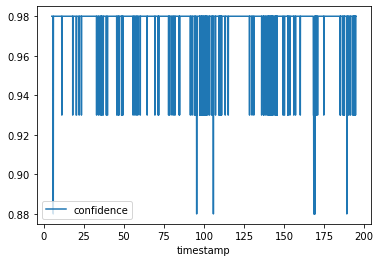

ML0327_1
[]


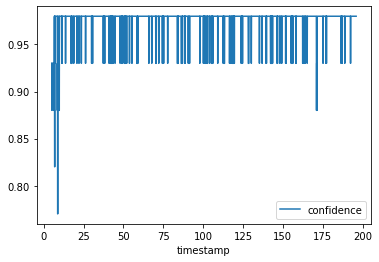

ML0328_1
[]


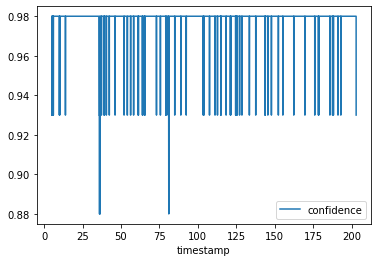

ML0329_1
[]


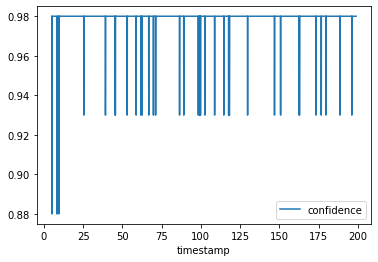

ML0330_1
[]


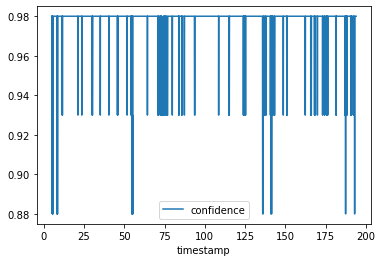

ML0331_1
[]


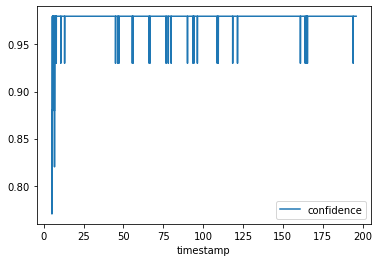

ML0332_1
[]


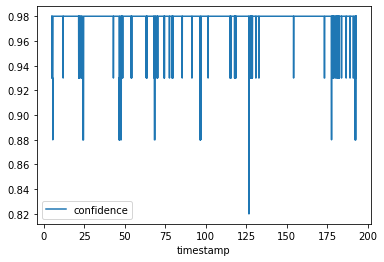

ML0334_1
[]


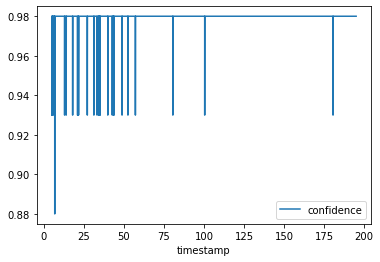

ML0335_1
[]


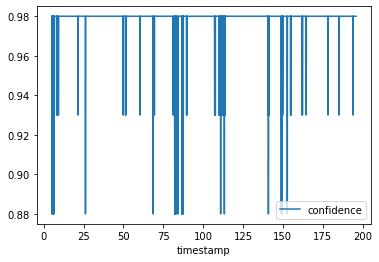

ML0336_1
[]


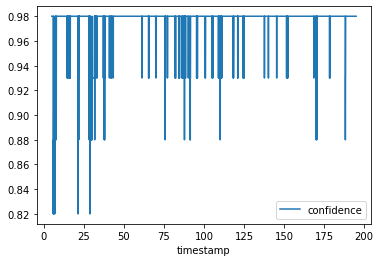

ML0337_1
[]


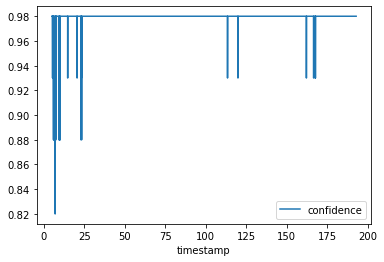

ML0338_1
[]


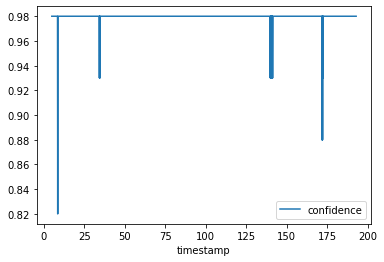

ML0339_1
[75.309, 101.268, 101.285, 101.301, 101.351, 101.451, 101.485, 101.518, 101.551, 101.585, 101.618, 101.635, 101.652, 101.668, 101.735, 101.752, 101.768, 101.785, 101.802, 101.818, 101.835, 101.852, 101.885, 101.985, 102.019, 102.085, 102.169, 102.202, 102.402, 102.436, 102.502, 116.867, 116.9, 116.933, 141.008, 141.074, 153.236, 153.27, 160.427, 160.444, 160.46, 160.477, 160.494, 160.51, 160.527, 160.544, 160.56, 160.577, 160.594, 160.61, 160.627, 160.644, 160.661, 160.677, 160.694, 160.711, 160.727, 160.744, 160.761, 160.777, 160.794, 160.811, 160.827, 160.844, 160.861, 160.877, 160.894, 160.911, 160.927, 160.944, 160.961, 160.977, 160.994, 161.011, 161.028, 161.044, 161.061, 161.078, 161.094, 161.111, 161.128, 161.144, 161.178, 161.194, 161.211, 161.228, 161.244, 161.261, 161.278, 161.411, 161.428, 161.445, 161.461, 169.686, 169.82, 169.886, 183.934, 183.967, 185.085, 192.809, 192.826, 193.16, 193.176, 193.193, 193.21, 193.226, 193.26, 193.343, 193.393, 193.41, 193.427, 193.

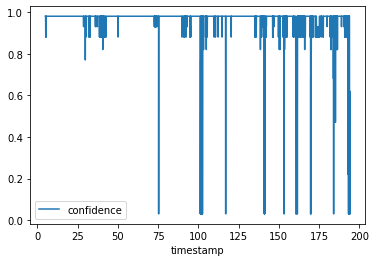

ML0340_1
[]


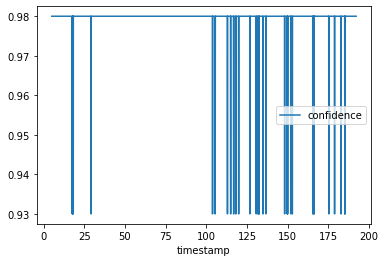

ML0341_1
[61.228, 61.245, 61.261, 61.278, 61.295, 61.311, 61.328, 61.345, 61.361, 61.378, 61.395, 61.411]


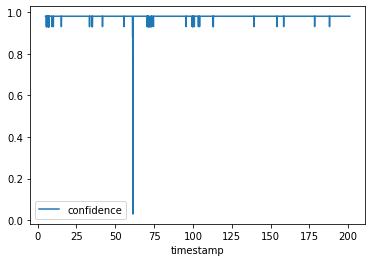

ML0342_1
[71.388, 71.421, 71.488]


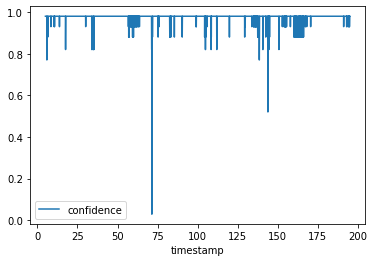

ML0343_1
[]


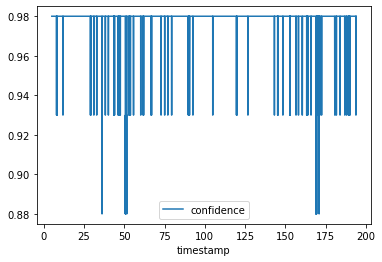

ML0344_1
[]


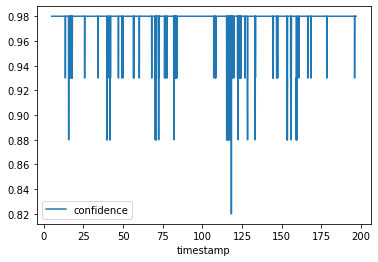

ML0345_1
[]


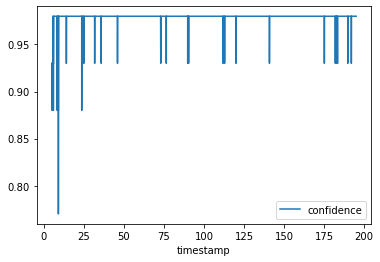

ML0347_1
[]


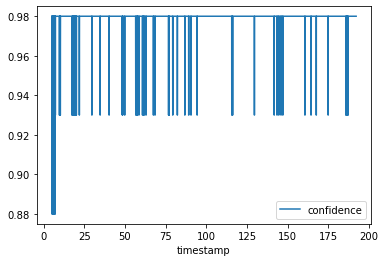

ML0348_1
[]


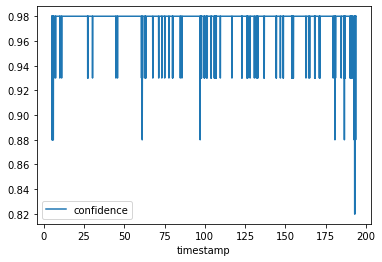

ML0349_1
[]


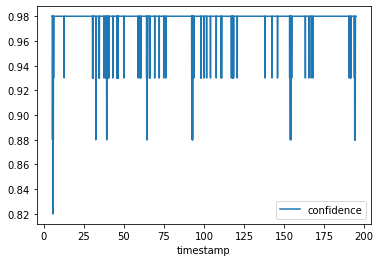

ML0350_1
[14.882, 14.898, 14.915, 14.932]


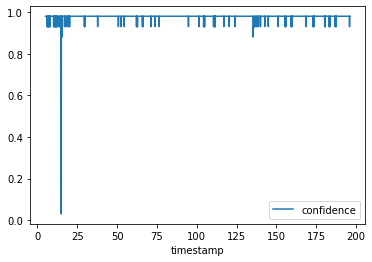

ML0351_1
[]


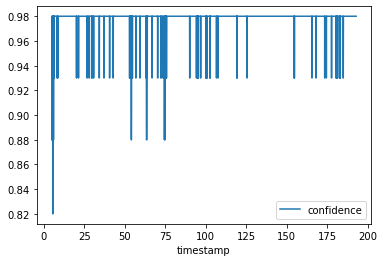

ML0352_1
[]


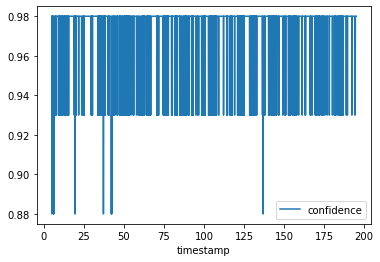

ML0353_1
[]


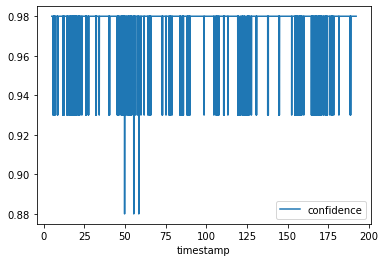

ML0354_1
[]


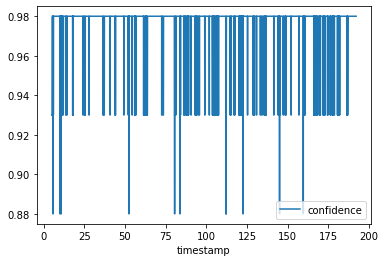

ML0355_1
[]


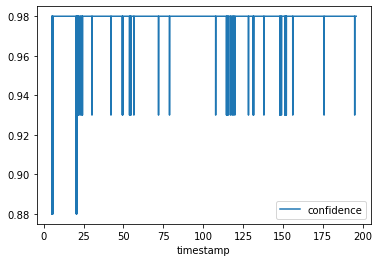

ML0357_1
[]


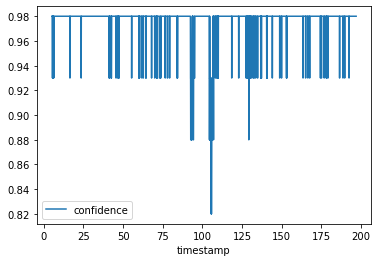

ML0358_1
[6.39, 7.858, 7.991, 8.008, 8.025, 8.041, 8.058, 8.075, 8.091, 8.108, 8.125, 8.141, 8.158, 8.175, 8.192, 8.208, 8.225, 8.242, 8.258, 8.275, 8.292, 8.308, 8.325, 8.342, 8.358, 8.375, 8.392, 8.408, 8.425, 8.442, 8.458, 8.475, 8.559, 8.592, 8.609, 8.625, 8.642, 8.659, 8.675, 8.692, 8.709, 8.725, 8.742, 8.759, 8.775, 8.792, 8.809]


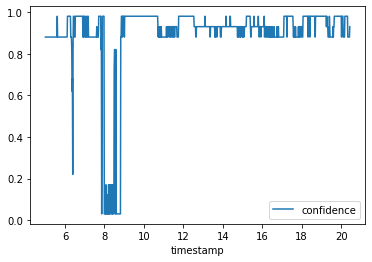

ML0359_1
[32.099]


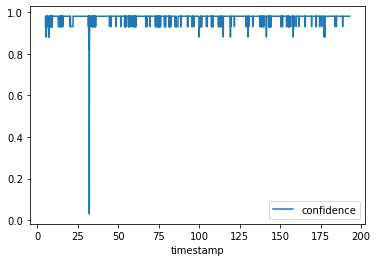

ML0360_1
[192.743]


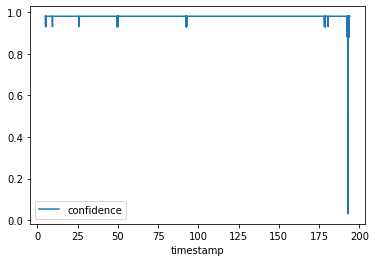

ML0361_1
[]


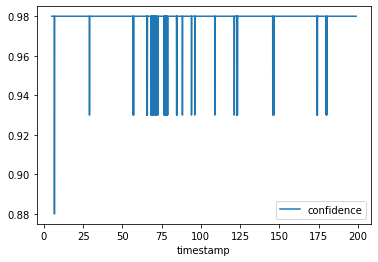

ML0362_1
[43.51]


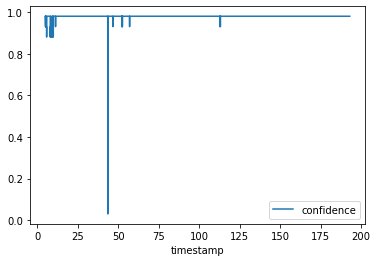

ML0363_1
[]


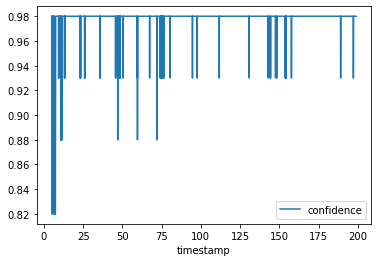

ML0364_1
[]


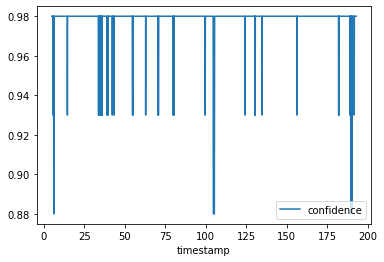

ML0365_1
[]


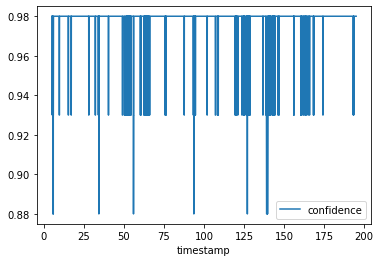

ML0366_1
[]


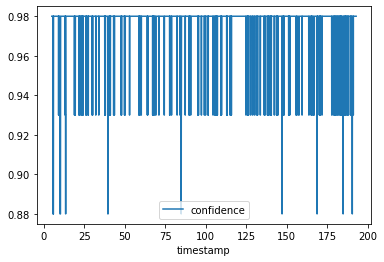

ML0368_1
[]


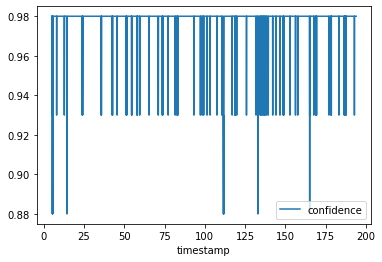

ML0369_1
[8.825, 8.842, 8.859, 8.876]


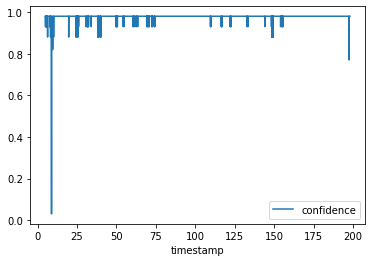

ML0370_1
[]


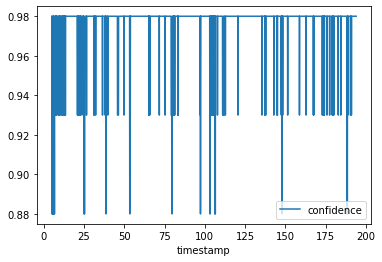

ML0371_1
[]


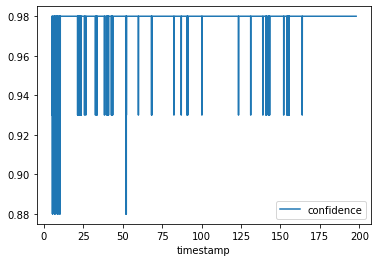

ML0372_1
[]


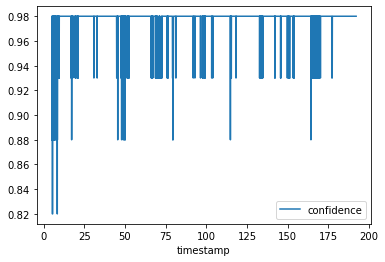

VideoData


KeyError: 'timestamp'

In [21]:
t = 0
bad_data_frames = []
for csv in csvs:
    # Total Number of Videos, prevents errors
    if t > 246:
        break
    t+=1
    df1 = pd.read_csv(csv, index_col=None, header = 0)
    df = df1.tail(-300)
    file_name = csv.split('\\')
    ID = file_name[1].split('.csv')
    print(ID[0])
    df.plot(x='timestamp', y='confidence')
    good_data = df[df.confidence >= 0.5]
    bad_data = df[df.confidence < 0.5]
    print(list(bad_data["timestamp"]))
    plt.show()

# Part 3: Generate 13 Variables
1. For each file in 'csvs'
    a. Run pd.read_csv to get each column in csv
    b. Take out bad frames with confidence below 0.6 
    c. Generate 13 variables based on 3 columns: 'pose_Rx', 'pose_Ry', 'pose_Rz'
2. Notes on what each variable is:
- *Note: each variable takes the individual values of the pitch, yaw, and roll
- v1x, v1y, v1z = Square root of average square values of each frame
- v2x, v2y, v2z = Sqrt of average difference of consecutive frames squared
- v3x, v3y, v3z = maximum value - minimum value across all frames
- v4x, v4y, v4z = Sum of the positive difference between consecutive frames divided by frames per second
- v13 = Average of slant from all three directions

In [15]:
data =[]
vdata = []
print(len(csvs))
t = 0
for proj in csvs:

#     print(proj)
    file_name = proj.split('\\')
    ID = file_name[1].split('.csv')
#     print(ID[0])
                    
    t+=1
    df = pd.read_csv(proj, index_col=None, header = 0)
    

    good_data = df[df['confidence'] >= 0.6]
    print(good_data)
    good_data.nsmallest(n = math.floor(50), columns = ['confidence'])

    dfRx = good_data['pose_Rx']
    dfRy = good_data['pose_Ry']
    dfRz = good_data['pose_Rz']
    frames = good_data['frame']
    if (dfRx.size == 0 or dfRy.size == 0 or dfRz.size == 0):
        continue
    
    v1x = math.sqrt(dfRx.pow(2).sum()/dfRx.size)
    v2x = 0.0
    v4x = 0.0
    for i in range(len(dfRx)):
        if (i == 1):
            continue
        if pd.isna(dfRx.iloc[i]):
            dfRx.iloc[i] = 0
        if pd.isna(dfRx.iloc[i-1]):
            dfRx.iloc[i-1] = 0
        if frames.iloc[i]-frames.iloc[i-1] > 10:
            continue
        v2x += (float(dfRx.iloc[i]) - float(dfRx.iloc[i-1])) ** 2
        v4x += abs(float(dfRx.iloc[i]) - float(dfRx.iloc[i-1]))
    v2x = math.sqrt(v2x/dfRx.size)
    v3x = dfRx.max() - dfRx.min()
    v4x = 1800*v4x/dfRx.size
    
    v1y = math.sqrt(dfRy.pow(2).sum()/dfRy.size)
    v2y = 0.0
    v4y = 0.0
    for i in range(len(dfRy)):
        if (i == 1):
            continue
        if pd.isna(dfRy.iloc[i]):
            dfRy.iloc[i] = 0
        if pd.isna(dfRy.iloc[i-1]):
            dfRy.iloc[i-1] = 0
        if frames.iloc[i]-frames.iloc[i-1] > 10:
            continue
        v2y += (float(dfRy.iloc[i]) - float(dfRy.iloc[i-1])) ** 2
        v4y += abs(float(dfRy.iloc[i]) - float(dfRy.iloc[i-1]))
    v2y = math.sqrt(v2y/dfRy.size)
    v3y = dfRy.max() - dfRy.min()
    v4y = 1800*v4y/dfRy.size
    
    v1z = math.sqrt(dfRz.pow(2).sum()/dfRz.size)
    v2z = 0.0
    v4z = 0.0
    for i in range(len(dfRz)):
        if (i == 1):
            continue
        if pd.isna(dfRz.iloc[i]):
            dfRz.iloc[i] = 0
        if pd.isna(dfRz.iloc[i-1]):
            dfRz.iloc[i-1] = 0
        if frames.iloc[i]-frames.iloc[i-1] > 10:
            continue
        v2z += (float(dfRz.iloc[i]) - float(dfRz.iloc[i-1])) ** 2
        v4z += abs(float(dfRz.iloc[i]) - float(dfRz.iloc[i-1]))
    v2z = math.sqrt(v2z/dfRz.size)
    v3z = dfRz.max() - dfRz.min()
    v4z = 1800*v4z/dfRz.size
    
    v13 = 0.0
    for i in range(len(dfRx)):
        if pd.isna(dfRz.iloc[i]):
            dfRz.iloc[i] = 0
        if pd.isna(dfRy.iloc[i]):
            dfRy.iloc[i] = 0
        if pd.isna(dfRx.iloc[i]):
            dfRx.iloc[i] = 0
        v13 += math.sqrt(float(dfRx.iloc[i])**2+float(dfRy.iloc[i])**2+float(dfRz.iloc[i])**2)
    v13 /= dfRx.size
    
    variables = {'ID':  ID[0], 'v1_x':v1x, 'v2_x':v2x, 'v3_x':v3x, 'v4_x':v4x,'v1_y':v1y, 'v2_y':v2y, 'v3_y':v3y, 'v4_y':v4y, 'v1_z':v1z, 'v2_z':v2z, 'v3_z':v3z, 'v4_z':v4z, 'v13':v13}
    vdata.append(variables)
    
    df1 = pd.DataFrame(good_data, columns=['frame'])
    df2 = pd.DataFrame(good_data, columns=['confidence'])
    data.append(good_data)
#     print(df)
print(data)#Check Output 1
# df2 = pd.concat(data, ignore_index=True)
# Are face IDs always 0?
# df2#check output 2

246
      frame  face_id  timestamp  confidence  success  gaze_0_x  gaze_0_y  \
0         1        0      0.000        0.98        1  0.286792  0.035340   
1         2        0      0.033        0.98        1  0.301356  0.011748   
2         3        0      0.067        0.98        1  0.329019  0.023235   
3         4        0      0.100        0.98        1  0.314492  0.028849   
4         5        0      0.133        0.98        1  0.313504  0.032946   
...     ...      ...        ...         ...      ...       ...       ...   
5515   5516        0    183.833        0.98        1  0.080602 -0.013785   
5516   5517        0    183.867        0.98        1  0.079293 -0.066252   
5517   5518        0    183.900        0.98        1  0.076337 -0.056633   
5518   5519        0    183.933        0.98        1  0.071206 -0.049768   
5519   5520        0    183.967        0.98        1  0.065964 -0.041562   

      gaze_0_z  gaze_1_x  gaze_1_y  ...  AU12_c  AU14_c  AU15_c  AU17_c  \
0    -0.

KeyError: 'confidence'

In [16]:
vdata

[{'ID': 'ML0001_1',
  'v1_x': 0.2898280365335099,
  'v2_x': 0.016113450812952654,
  'v3_x': 0.624,
  'v4_x': 22.34054347826115,
  'v1_y': 0.09772014444542527,
  'v2_y': 0.009314979365500835,
  'v3_y': 0.717,
  'v4_y': 11.915217391304488,
  'v1_z': 0.060667387318541835,
  'v2_z': 0.004765364167844229,
  'v3_z': 0.471,
  'v4_z': 6.224347826087,
  'v13': 0.30266605161494636},
 {'ID': 'ML0002_1',
  'v1_x': 0.18408924148039948,
  'v2_x': 0.013671117710687027,
  'v3_x': 0.894,
  'v4_x': 18.230918918919215,
  'v1_y': 0.2626893091717917,
  'v2_y': 0.012234628156430713,
  'v3_y': 0.989,
  'v4_y': 16.347243243243483,
  'v1_z': 0.2644445155449472,
  'v2_z': 0.009199696430557456,
  'v3_z': 0.9530000000000001,
  'v4_z': 9.696972972973176,
  'v13': 0.4072077851744031},
 {'ID': 'ML0003_1',
  'v1_x': 0.1759012009611655,
  'v2_x': 0.014403155838324834,
  'v3_x': 0.926,
  'v4_x': 17.06781937216742,
  'v1_y': 0.07885088231444205,
  'v2_y': 0.026174236371973015,
  'v3_y': 1.654,
  'v4_y': 12.9746852442506

In [17]:
vdata_df = pd.DataFrame(vdata)

In [18]:
vdata_df

ID      v1_x      v2_x   v3_x       v4_x      v1_y      v2_y  \
0    ML0001_1  0.289828  0.016113  0.624  22.340543  0.097720  0.009315   
1    ML0002_1  0.184089  0.013671  0.894  18.230919  0.262689  0.012235   
2    ML0003_1  0.175901  0.014403  0.926  17.067819  0.078851  0.026174   
3    ML0004_1  0.149010  0.015899  0.586  20.711676  0.199604  0.015027   
4    ML0005_1  0.151341  0.026624  0.932  31.868534  0.136998  0.017510   
..        ...       ...       ...    ...        ...       ...       ...   
239  ML0368_1  0.095358  0.016379  0.897  22.541096  0.141248  0.011877   
240  ML0369_1  0.146147  0.036598  2.770  18.686986  0.163145  0.028315   
241  ML0370_1  0.153085  0.019076  1.432  22.563665  0.132275  0.013891   
242  ML0371_1  0.167880  0.016084  1.271  21.728604  0.196393  0.014356   
243  ML0372_1  0.122134  0.019892  1.625  21.652707  0.120575  0.012525   

      v3_y       v4_y      v1_z      v2_z   v3_z       v4_z       v13  
0    0.717  11.915217  0.060667  0.004765  0.471   6.224348  0.302666  
1    0.989  16.347243  0.264445  0.009200  0.953   9.696973  0.407208  
2    1.654  12.974685  0.204295  0.009542  0.802   7.091825  0.274058  
3    1.163  14.678919  0.137537  0.005743  0.333   6.868541  0.259202  
4    1.436  15.350247  0.040816  0.006643  0.320   6.909720  0.185784  
..     ...        ...       ...       ...    ...        ...       ...  
239  1.318  10.639023  0.081457  0.005519  0.520   6.700353  0.154946  
240  1.792  15.158597  0.166149  0.033648  2.796   9.331811  0.234637  
241  1.655  12.186180  0.141560  0.007789  0.821   7.490062  0.221313  
242  1.373  17.596596  0.201129  0.008081  1.050  10.000472  0.301816  
243  1.845   9.313424  0.143145  0.008861  0.967   6.039673  0.178340  

[244 rows x 14 columns]

In [19]:
vdata_df.to_csv("C:/Users/fanj4/OneDrive - Children's Hospital of Philadelphia/Documents/Video_Data/VideoDataUpdated_Version2.csv")